# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Uso-de-series-en-API-Series-de-Tiempo" data-toc-modified-id="Uso-de-series-en-API-Series-de-Tiempo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uso de series en API Series de Tiempo</a></div><div class="lev1 toc-item"><a href="#Indice" data-toc-modified-id="Indice-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Indice<span class="tocSkip"></span></a></div><div class="lev1 toc-item"><a href="#Resumen-ejecutivo" data-toc-modified-id="Resumen-ejecutivo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resumen ejecutivo</a></div><div class="lev2 toc-item"><a href="#Origen-de-las-llamadas" data-toc-modified-id="Origen-de-las-llamadas-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Origen de las llamadas</a></div><div class="lev2 toc-item"><a href="#Sobre-las-fuentes-primarias" data-toc-modified-id="Sobre-las-fuentes-primarias-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sobre las fuentes primarias</a></div><div class="lev2 toc-item"><a href="#Estado-de-las-series-publicadas" data-toc-modified-id="Estado-de-las-series-publicadas-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Estado de las series publicadas</a></div><div class="lev3 toc-item"><a href="#Histogramas-de-las-series-diaras-actualizadas-y-desactualizadas" data-toc-modified-id="Histogramas-de-las-series-diaras-actualizadas-y-desactualizadas-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Histogramas de las series diaras actualizadas y desactualizadas</a></div><div class="lev2 toc-item"><a href="#Llamadas-mensuales---Período-completo" data-toc-modified-id="Llamadas-mensuales---Período-completo-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Llamadas mensuales - Período completo</a></div><div class="lev2 toc-item"><a href="#Números-generales" data-toc-modified-id="Números-generales-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Números generales</a></div><div class="lev3 toc-item"><a href="#Sobre-las-consultas" data-toc-modified-id="Sobre-las-consultas-351"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Sobre las consultas</a></div><div class="lev3 toc-item"><a href="#Sobre-los-usuarios" data-toc-modified-id="Sobre-los-usuarios-352"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Sobre los usuarios</a></div><div class="lev3 toc-item"><a href="#Series-populares" data-toc-modified-id="Series-populares-353"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Series populares</a></div><div class="lev1 toc-item"><a href="#Cantidad-de-llamadas" data-toc-modified-id="Cantidad-de-llamadas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cantidad de llamadas</a></div><div class="lev2 toc-item"><a href="#Perfil-de-las-series" data-toc-modified-id="Perfil-de-las-series-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Perfil de las series</a></div><div class="lev3 toc-item"><a href="#Perfil-de-series-diarias" data-toc-modified-id="Perfil-de-series-diarias-411"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Perfil de series diarias</a></div><div class="lev1 toc-item"><a href="#Cantidad-de-usuarios" data-toc-modified-id="Cantidad-de-usuarios-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cantidad de usuarios</a></div><div class="lev2 toc-item"><a href="#Comportamiento-de-usuarios-segmentados-por-tipo-de-consumo" data-toc-modified-id="Comportamiento-de-usuarios-segmentados-por-tipo-de-consumo-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Comportamiento de usuarios segmentados por tipo de consumo</a></div><div class="lev3 toc-item"><a href="#Descripción-de-la-variables" data-toc-modified-id="Descripción-de-la-variables-511"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Descripción de la variables</a></div><div class="lev3 toc-item"><a href="#Segmentación-para-el-período-completo" data-toc-modified-id="Segmentación-para-el-período-completo-512"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Segmentación para el período completo</a></div><div class="lev3 toc-item"><a href="#Series-más-consultadas-por-grupo" data-toc-modified-id="Series-más-consultadas-por-grupo-513"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Series más consultadas por grupo</a></div><div class="lev1 toc-item"><a href="#Anexo" data-toc-modified-id="Anexo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Anexo</a></div><div class="lev2 toc-item"><a href="#Fuentes-primarias" data-toc-modified-id="Fuentes-primarias-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fuentes primarias</a></div>

In [1]:
FROM_DATE = '2018-01-01'

In [2]:
import sys
import os
import locale

module_path = os.path.abspath(os.path.join('../../tools'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import gc

import re
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.patches as patches

from pylab import *
import matplotlib.gridspec as gridspec

import seaborn as sns
from urllib.parse import parse_qs

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import maxabs_scale, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import squarify

import analytics_tools
from IPython.core.display import display, HTML
import dask.dataframe as dd

locale.setlocale(locale.LC_ALL, '')

%matplotlib inline

sns.set()
plt.rcParams['image.cmap'] = 'Accent'

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', -1)
pd.set_option('precision',2)
pd.set_option('display.float_format', lambda x: locale.format_string('%d', x, 1))

import arrow

In [3]:
def display_html(content, tag='p'):
    display(HTML( '<{0}>{1}</{0}>'.format(tag,content) ))

# Uso de series en API Series de Tiempo

In [4]:
mssg = 'Reporte creado el día: {}'.format(str(pd.Timestamp.today())) 

display_html(mssg)


<h1>Indice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Uso-de-series-en-API-Series-de-Tiempo" data-toc-modified-id="Uso-de-series-en-API-Series-de-Tiempo-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Uso de series en API Series de Tiempo</a></span></li><li><span><a href="#Resumen-ejecutivo" data-toc-modified-id="Resumen-ejecutivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Resumen ejecutivo</a></span><ul class="toc-item"><li><span><a href="#Origen-de-las-llamadas" data-toc-modified-id="Origen-de-las-llamadas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Origen de las llamadas</a></span></li><li><span><a href="#Sobre-las-fuentes-primarias" data-toc-modified-id="Sobre-las-fuentes-primarias-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sobre las fuentes primarias</a></span></li><li><span><a href="#Estado-de-las-series-publicadas" data-toc-modified-id="Estado-de-las-series-publicadas-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Estado de las series publicadas</a></span><ul class="toc-item"><li><span><a href="#Histogramas-de-las-series-diaras-actualizadas-y-desactualizadas" data-toc-modified-id="Histogramas-de-las-series-diaras-actualizadas-y-desactualizadas-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Histogramas de las series diaras actualizadas y desactualizadas</a></span></li></ul></li><li><span><a href="#Llamadas-mensuales---Período-completo" data-toc-modified-id="Llamadas-mensuales---Período-completo-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Llamadas mensuales - Período completo</a></span></li><li><span><a href="#Números-generales" data-toc-modified-id="Números-generales-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Números generales</a></span><ul class="toc-item"><li><span><a href="#Sobre-las-consultas" data-toc-modified-id="Sobre-las-consultas-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Sobre las consultas</a></span></li><li><span><a href="#Sobre-los-usuarios" data-toc-modified-id="Sobre-los-usuarios-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Sobre los usuarios</a></span></li><li><span><a href="#Series-populares" data-toc-modified-id="Series-populares-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Series populares</a></span></li></ul></li></ul></li><li><span><a href="#Cantidad-de-llamadas" data-toc-modified-id="Cantidad-de-llamadas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cantidad de llamadas</a></span><ul class="toc-item"><li><span><a href="#Perfil-de-las-series" data-toc-modified-id="Perfil-de-las-series-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Perfil de las series</a></span><ul class="toc-item"><li><span><a href="#Perfil-de-series-diarias" data-toc-modified-id="Perfil-de-series-diarias-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Perfil de series diarias</a></span></li></ul></li></ul></li><li><span><a href="#Cantidad-de-usuarios" data-toc-modified-id="Cantidad-de-usuarios-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cantidad de usuarios</a></span><ul class="toc-item"><li><span><a href="#Comportamiento-de-usuarios-segmentados-por-tipo-de-consumo" data-toc-modified-id="Comportamiento-de-usuarios-segmentados-por-tipo-de-consumo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comportamiento de usuarios segmentados por tipo de consumo</a></span><ul class="toc-item"><li><span><a href="#Descripción-de-la-variables" data-toc-modified-id="Descripción-de-la-variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Descripción de la variables</a></span></li><li><span><a href="#Segmentación-para-el-período-completo" data-toc-modified-id="Segmentación-para-el-período-completo-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Segmentación para el período completo</a></span></li><li><span><a href="#Series-más-consultadas-por-grupo" data-toc-modified-id="Series-más-consultadas-por-grupo-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Series más consultadas por grupo</a></span></li></ul></li></ul></li><li><span><a href="#Anexo" data-toc-modified-id="Anexo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Anexo</a></span><ul class="toc-item"><li><span><a href="#Fuentes-primarias" data-toc-modified-id="Fuentes-primarias-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fuentes primarias</a></span></li></ul></li></ul></div>

In [5]:
# Carga y normalización de analytics

In [6]:
## Setup

In [7]:
## Funciones auxiliares

In [8]:
# formarters
f_ar = lambda x: locale.format_string('%.2f', x, 1)
d_ar = lambda x: locale.format_string('%d', x, 1)

tz_arg = lambda x: pd.to_datetime(x).tz_localize('UTC').tz_convert(tz='America/Argentina/Buenos_Aires')

TABLE_COUNTER = 0
TABLE_TEMPLATE = """
<center><strong><small>{title}</small></strong></center>
<center>{table}</center>
<center><strong><small>Tabla {table_number}</small></strong></center>
"""
    
def table_counter():
    global TABLE_COUNTER
    TABLE_COUNTER += 1
    return TABLE_COUNTER

def add_style_to_df(df, subset, color='black', font_weight=None):
    render = df.style.set_properties(
        subset= subset, 
        **{'font-weight': font_weight, 'color':color}).render().replace('\n','')
    return render

def add_title(df_html, title):
    str_table = TABLE_TEMPLATE.format(title=title, table=df_html, table_number=table_counter())
    return str_table.replace('\n','')

def put_df_on_report(df, title, subset=None, color='black', font_weight='bold'):
    if subset:
        df_html = add_style_to_df(df, subset=subset,color=color, font_weight=font_weight)
    else:
        df_html = df.to_html().replace('\n','')
    return add_title(df_html, title)

In [9]:
midpoint = lambda x: (np.max(x)+ np.min(x))/2
log_midpoint = lambda x: np.power(10,((np.log10(np.max(x))+np.log10(np.min(x)))/2))

def read_files_to_df(directory, cols, start_date=None):
    """Lee CSVs de misma estructura en un directorio a un solo DataFrame."""
    
    start_date = start_date or arrow.now().shift(years=-1).format("YYYY-MM-DD")
    file_pattern = os.path.join(directory, "*.csv") 
    filtered_files = [
        file for file in glob.glob(file_pattern) 
        if arrow.get(file.split("_")[1].split(".")[0]) > arrow.get(start_date)
    ]

    dfs = [pd.read_csv(file, usecols = cols, encoding="utf8", parse_dates=True)
           for file in filtered_files]
        
    return pd.concat(dfs, axis=0)

def parse_ids(qs):
    if pd.notna(qs):
        if 'ids' in qs:
            params = parse_qs(qs)
            ids_values_str = params.get('ids',[''])[0]
        else:
            ids_values_str = qs

        return [value.split(':')[0] for value in ids_values_str.split(',')]
    else:
        return []

def iter_series_ids(df):
    for analytic_id, id_list in zip(df.id, df.ids):
            if isinstance(id_list, list):
                for serie_id in id_list:
                    yield (analytic_id, serie_id)
    
def unfold_series_id(df):
    list_ids = []
    for analytic_id, serie_id in iter_series_ids(df):
        list_ids.append([analytic_id, serie_id])
        
    df_ids = pd.DataFrame(list_ids, columns=['analytic_id','serie_id'])
    df_ids.dropna(inplace=True)
    
    df_ids['analytic_id'] = df_ids['analytic_id'].astype(object)
    
    df_extended = df_ids.merge(df, left_on='analytic_id', right_on='id')
    df_extended = df_extended.drop(columns=['analytic_id'])
    
    return df_extended

def replace_and_drop_column(df, old_column, new_column):
    df[new_column] = df[old_column]
    new_df = df.drop(old_column, axis=1)
    return new_df

def add_totals(df):
    df_to_append = pd.DataFrame(df.sum(numeric_only=True)).T
    
    df_appended = df.append(df_to_append)
    
    as_list = df_appended.index.tolist()
    idx = as_list.index(0)
    as_list[idx] = 'Total'
    df_appended.index = as_list
    
    return df_appended

def add_linear_regression(df, target_col, index_as_feature=True, feature_cols=''):
    if index_as_feature:
        X = df.index.values.reshape(-1, 1)
    else:
        n_r, n_c = df[feature_cols].shape
        X = df[feature_cols].values.reshape(-1, n_c)
        
    y = df[target_col].values
    
    reg = LinearRegression()
    reg.fit(X, y)
    
#     df['linear_regression'] = 
    return reg.predict(X)

#
def interpolate_by_days(df, column, date_col='' ,days=1, floor=0):
    df['day_factor'] = pd.DatetimeIndex(df[date_col]).dayofyear % days
    day_factor_unique = df.day_factor.unique()
    list_df = []

    call_col_inter = column + '_inter'
    
    for day_factor in day_factor_unique:
#         for call_col in columns:
        
        filter_by_df = df.day_factor == day_factor
        df_f = df[filter_by_df]
        df_f[call_col_inter] = df_f[column].apply(lambda x: np.nan if x < floor else x)
        df_f.loc[:,call_col_inter] = df_f[call_col_inter].interpolate(method='linear', limit_direction='both',inplace=False)
        list_df.append(df_f)
        del df_f

    df_inter = pd.concat(list_df, sort=True)
    
    return df_inter[call_col_inter]

In [10]:
# para retención de usr
def get_week(d):
    start = d - pd.Timedelta(days=d.weekday())
    end = start + pd.Timedelta(days=6)
    return end

def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

In [11]:
# para clusterizar
# recibe un unfolded
def get_nunique_series_avg(df, frequency='W'):
    """Devuelve el promedio de cantidad de series únicas por la frencuencia indicada """
    df_list = []
    
    for frequency in 'DWM':
        if frequency is 'D':
            col = 'date'
            frec_col = 'series_unicas_diarias'
        elif frequency is 'W':
            col = 'weekofyear'
            frec_col = 'series_unicas_semanales'
        elif frequency is 'M':
            col = 'month'
            frec_col = 'series_unicas_mensuales'
        else:
            return
        
        df_avg_series = df.groupby(['ip_address',col]).nunique()['serie_id'].reset_index()
        
#         n_series_unicas = df_avg_series.serie_id.count()
        
        df_avg_series = df_avg_series[['ip_address', 'serie_id']].groupby('ip_address').mean()
        df_avg_series.rename({'serie_id':frec_col},axis=1, inplace=True) 
                
        df_list.append(df_avg_series)

    df_series_avg = pd.concat(df_list, axis=1).reset_index()
    
    ass = df[['month','ip_address', 'serie_id','indice_tiempo_frecuencia']].drop_duplicates()
    id_unicos_por_ip_mes = ass.groupby(['ip_address','month']).nunique()['serie_id'].reset_index()
    
    serie_diaria = ass.indice_tiempo_frecuencia.str.contains('R/P1D')
    id_diarios_unicos_por_ip_mes = ass[serie_diaria].groupby(['ip_address','month']).nunique()['serie_id'].reset_index()

    ### ip - su - sud
    ass = df[['ip_address', 'serie_id','indice_tiempo_frecuencia']].drop_duplicates()
    id_unicos_por_ip_mes = ass.groupby('ip_address').nunique()['serie_id'].reset_index()
    id_unicos_por_ip_mes.rename({'serie_id':'series_unicas'}, axis=1, inplace=True)
    serie_diaria = ass.indice_tiempo_frecuencia.str.contains('R/P1D')
    id_diarios_unicos_por_ip_mes = ass[serie_diaria].groupby('ip_address').nunique()['serie_id'].reset_index()
    id_diarios_unicos_por_ip_mes.rename({'serie_id':'series_diarias_unicas'}, axis=1, inplace=True)

    #n_id_diarios_unicos = id_diarios_unicos_por_ip_mes.groupby('ip_address').mean().reset_index()
    asss = id_unicos_por_ip_mes.merge(id_diarios_unicos_por_ip_mes, on='ip_address', how='left').fillna(0)

    ####
    assss = asss

    df_series_avg = df_series_avg.merge(assss, on='ip_address').fillna(0)

    return df_series_avg


# recibe un unfolded!
def get_ips_calls_max(df, frequency='D'):
    """Devuelve el promedio diario de llamadas por IP """
    if frequency is 'W':
        df_ncalls = df.groupby(['ip_address','weekofyear']).nunique()['id'].reset_index()
    elif frequency is 'D':
        df_ncalls = df.groupby(['ip_address','date']).nunique()['id'].reset_index()
    else:   
        return
    
    df_ncalls = df_ncalls.groupby(['ip_address']).max().reset_index()
    df_ncalls.rename({'id':'max_calls'},axis=1, inplace=True)
    df_ncalls.sort_values('max_calls', ascending=False, inplace=True)

    return df_ncalls

# recibe un unfolded!
def get_ips_calls_count(df, frequency='D', scale='linear'):
    """Devuelve el promedio diario de llamadas por IP """
    if frequency is 'W':
        df_ncalls = df.groupby(['ip_address','weekofyear']).nunique()['id'].reset_index()
    elif frequency is 'D':
        df_ncalls = df.groupby(['ip_address','date']).nunique()['id'].reset_index()
    else:   
        return
    
    df_ncalls = df_ncalls.groupby(['ip_address']).mean().reset_index()
    df_ncalls.rename({'id':'actividad'},axis=1, inplace=True)
    df_ncalls.sort_values('actividad', ascending=False, inplace=True)

    if scale is 'log':
        df_ncalls['actividad'] = df_ncalls.actividad.apply(np.log10)
    
    return df_ncalls

# recibe un unfolded!
def get_ips_persistency(df, frequency='W', scale='linear'):
    """Devuelve la proporción de semanas con actividad para cada IP
    Args:
        frequency: str. W o D
    """
    if frequency is 'W':
#         group_cols = ['year','month','ip_address']
#         data_cols = group_cols + ['weekofyear']
#         n_frec = df[['year','month','weekofyear']].groupby(['year','month']).nunique()[['weekofyear']].sum().values[0]
#         df_persistency = df[data_cols].groupby(group_cols).nunique()[['weekofyear']]

        group_cols = ['ip_address']
        data_cols = group_cols + ['weekdate']
        n_frec = df['weekdate'].nunique()
        df_persistency = df[data_cols].groupby(group_cols).nunique()[['weekdate']]
        
#         print(n_frec)

    elif frequency is 'D':
        group_cols = ['ip_address']
        data_cols = group_cols + ['date']

        n_frec = df.date.nunique()

        df_persistency = df[data_cols].groupby(group_cols).nunique()[['date']]
    else:   
        return
    
    df_persistency = df_persistency.unstack(level=0).unstack(level=0)
    df_persistency = df_persistency.fillna(0).sum(1).reset_index()
    df_persistency.rename({0:'persistencia'},axis=1, inplace=True)
    df_persistency.sort_values('persistencia', ascending=False, inplace=True)
    df_persistency['persistencia'] = df_persistency.persistencia.divide(n_frec/100)
    
    if scale is 'log':
        df_persistency['persistencia'] = df_persistency.persistencia.apply(np.log10)

    return df_persistency

# recibe un unfolded!
def get_ip_features(df, frequencies={'persistencia':'W','actividad':'D'}, scales={'persistencia':'linear','actividad':'log'}):
    
    df_ncalls = get_ips_calls_count(df, frequency=frequencies['actividad'], scale=scales['actividad'])
    df_persistency = get_ips_persistency(df, frequency=frequencies['persistencia'], scale=scales['persistencia'])
#     df_maxcalls = get_ips_calls_max(df)

    df_ip_features = df_ncalls.merge(df_persistency, how='inner', on='ip_address')
#     df_ip_features = df_ip_features.merge(df_maxcalls, how='inner', on='ip_address')
    
    return df_ip_features

# 
def cluster_ips(df, n_kmeans=3, frequencies={'persistencia':'W','actividad':'D'}, scales={'persistencia':'linear','actividad':'log'},labels=None):
    df_ip_features = get_ip_features(df, frequencies, scales)

    X = df_ip_features[['actividad','persistencia']].values.reshape(-1, 2)
    X_minmax = MinMaxScaler().fit_transform(X)
#     X_minmax = StandardScaler().fit_transform(X)
    
    clusters_id = KMeans(n_kmeans, random_state=0).fit_predict(X_minmax)

    ips_clusterizados = df_ip_features.merge(pd.DataFrame(clusters_id), how='inner', left_index=True, right_index=True)
    ips_clusterizados.rename({0:'cluster_id'}, axis=1, inplace=True)
    ips_clusterizados['cluster_name'] = ips_clusterizados.cluster_id.apply(lambda x: labels[x])
    return ips_clusterizados


In [12]:
from pylab import *
import matplotlib.gridspec as gridspec

def make_cluster_plots(df_cluster, clusters, exclude_clusters_id=None):
    
    G = gridspec.GridSpec(4, 3)

    plt.figure(figsize=[15,20])
    
    axes_1 = subplot(G[0:2, :])
    plt.scatter(df_cluster['actividad'], df_cluster['persistencia'], c=df_cluster['color'], s=50,alpha=.7);
    plt.title('Segmentación de usuarios, período completo')
    plt.xlabel('actividad')
    plt.ylabel('persistencia');

    axes_3 = subplot(G[2:,:-1])
    act_std = df_cluster.actividad.std()
    pers_std = df_cluster.persistencia.std()
    act_mean = df_cluster.actividad.mean()
    pers_mean = df_cluster.persistencia.mean()

    df_cluster['actividad_norm'] = minmax_scale(df_cluster.actividad, feature_range=(act_mean-2*act_std,act_mean+2*act_std))
    df_cluster['persistencia_norm'] = minmax_scale(df_cluster.persistencia, feature_range=(pers_mean-2*pers_std,pers_mean+2*pers_std))
    
    df_cluster_profile = df_cluster[~df_cluster.cluster_id.isin(exclude_clusters_id)].groupby(['cluster_id','cluster_name','color']).agg({'ip_address': pd.Series.nunique,
                                            'actividad_norm': pd.Series.mean,
                                            'persistencia_norm': pd.Series.mean}).reset_index()

    df_cluster_profile = df_cluster_profile.sort_values('ip_address', ascending=False)

    with sns.axes_style('white'):
    #     fig, ax = plt.subplots(figsize=(15,10))
        axes_3.spines['bottom'].set_position('center')
        axes_3.spines['left'].set_position('center')
        axes_3.spines['bottom'].set_color('grey')
        axes_3.spines['left'].set_color('grey')
        axes_3.spines['right'].set_color('none')
        axes_3.spines['top'].set_color('none')
        axes_3.xaxis.set_label_coords(.95, 0.48)
        axes_3.yaxis.set_label_coords(0.53, 0.08)
        axes_3.set_alpha(.2)

        a = np.abs(df_cluster_profile.actividad_norm)
        p = np.abs(df_cluster_profile.persistencia_norm)
        u = df_cluster_profile.ip_address
        cluster_s = a * u / 100

        df_cluster_profile.plot.scatter('actividad_norm','persistencia_norm', 
                                    c=df_cluster_profile.color.values,
#                                     c=df_cluster_profile.index.values,
                                    s=cluster_s, 
                                    cmap='Accent', 
                                    colorbar=False,
                                    alpha=.55,
                                    legend=True,
                                    ax=axes_3);

    for i, row in df_cluster_profile.iterrows():
        txt = row.cluster_name
        x = row.actividad_norm
        y = row.persistencia_norm
        axes_3.text(x, y, txt, horizontalalignment='center',verticalalignment='bottom')

    plt.xticks([])
    plt.yticks([])

    plt.xlabel('actividad');
    plt.ylabel('persistencia');
    plt.title('Variables normalizadas.');

    df_cluster_agg = df_cluster.groupby(['cluster_id','cluster_name','color']).agg({'ip_address': pd.Series.nunique,
                                                           'actividad': pd.Series.sum}).reset_index()
    df_cluster_agg = df_cluster_agg.sort_values('cluster_id')

    col = 'ip_address'
    title = 'Usuarios'
    axes = subplot(G[2,-1])


    patches = df_cluster_agg[col].plot(kind='pie',autopct='%.1f',labels=None, fontsize=0, colors=df_cluster_agg.color.values, ax=axes)
    plt.title(title)
    plt.ylabel('');
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_cluster_agg.cluster_name, df_cluster_agg[col].divide(df_cluster_agg[col].sum())*100)]
    plt.legend(labels=labels, loc='best')

    col = 'actividad'
    title = 'Llamadas'
    axes = subplot(G[3,-1])

    patches = df_cluster_agg[col].plot(kind='pie',autopct='%.1f',labels=None, fontsize=0, colors=df_cluster_agg.color.values, ax=axes)
    plt.title(title)
    plt.ylabel('');
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_cluster_agg.cluster_name, df_cluster_agg[col].divide(df_cluster_agg[col].sum())*100)]
    plt.legend(labels=labels, loc='best')
        
#     plt.savefig('../graphs/graphs-{}-clusters.png'.format(clusters), dpi=64)
    plt.show()
    
    

In [13]:
# esto necesita un superrefactor

def pie_plot_w_legend(pd_df=pd.DataFrame(),
                      title='',
                      colors=None,
                      colors_in_df=True,
                      ax=None):
    
#     colors = pd_df.iloc[:,1] if colors is None else colors
    txts = pd_df.index
    if colors is None and colors_in_df is False:
#         if colors_in_df is True:
        patches = pd_df.iloc[:,0].plot(kind='pie',autopct='%.2f',labels=['' for _ in pd_df.iloc[:,0]], fontsize=0, ax=ax, figsize=[15,15], startangle=45)
    if colors_in_df is True:
        colors = pd_df.iloc[:,1]
        patches = pd_df.iloc[:,0].plot(kind='pie',autopct='%.2f',labels=['' for _ in pd_df.iloc[:,0]], fontsize=0, ax=ax, figsize=[15,15], colors=colors, startangle=45)
    plt.title(title)
    plt.ylabel('');
    labels = ['{1:0.2f} % - {0}'.format(i,j) for i,j in zip(txts, pd_df.iloc[:,0].divide(pd_df.iloc[:,0].sum())*100)]
    plt.legend(labels=labels, loc='best');

In [14]:
## Datos analytics

In [15]:
# actualizo los analytics de ambas apis
analytics_tools.update_analytics()

In [16]:
# filtro las columnas no usadas. (al 2019-08-08 hay 240MB de diferencia)
curated_fields = ['id', 'ip_address', 'host', 'uri', 'querystring', 'start_time',
      'status_code', 'user_agent',
       'x_source']

In [17]:
# Cargo csv's
# df_analytics = read_files_to_df('/home/melik/sdt-analytics-download/')
df_analytics = read_files_to_df(analytics_tools.DIR_DATA_SDT, curated_fields)

In [18]:
# Filtro analytics por valores de interés
uri_serie = df_analytics.uri.str.contains('/series/api/series')
status_ok = df_analytics.status_code == 200
status_nan = df_analytics.status_code.isnull()

df_analytics = df_analytics[(uri_serie) & (status_ok | status_nan)]

In [19]:
# Filtro analytics. Saco ip's de test, saco períodos sin datos

# ips asociados al pico del 2018-12-21
test_ips = ['190.16.55.43','190.210.119.109', '190.246.123.181']
# ips asociados al pico del 2018-02-15
test_ips.extend(['195.162.12.14','190.18.52.25'])

exclude_test_ips = ~df_analytics.ip_address.isin(test_ips)
df_analytics = df_analytics[exclude_test_ips]

In [20]:
# Cambio el tipo de dato de la columna 'timestamp' a datetime
df_analytics['start_time_utc'] = pd.to_datetime(df_analytics['start_time'])

# df_analytics['start_time'] = pd.DatetimeIndex(df_analytics['start_time']).tz_localize('UTC').tz_convert(tz='America/Argentina/Buenos_Aires')
df_analytics['start_time'] = pd.DatetimeIndex(df_analytics['start_time']).tz_convert(tz='America/Argentina/Buenos_Aires')

df_analytics["date"] = pd.DatetimeIndex(df_analytics.start_time).normalize()
df_analytics["hour"] = pd.DatetimeIndex(df_analytics.start_time).hour
df_analytics["month"] = pd.DatetimeIndex(df_analytics.start_time).month
df_analytics["year"] = pd.DatetimeIndex(df_analytics.start_time).year
df_analytics['weekday'] = pd.DatetimeIndex(df_analytics.start_time).weekday
df_analytics['weekofyear'] = pd.DatetimeIndex(df_analytics.start_time).weekofyear
df_analytics['weekdate'] = df_analytics["date"].apply(get_week)
df_analytics['weekdate_short'] = df_analytics.weekdate.dt.strftime("%Y-%m-%d")
df_analytics['date_short'] = pd.DatetimeIndex(df_analytics.date).strftime('%Y-%m')

In [21]:
# Separo las ids de la llamada
df_analytics['ids'] = df_analytics.querystring.apply(parse_ids)

In [22]:
# Borro duplicados
df_analytics.drop_duplicates(subset='id', inplace=True)

In [23]:
## Datos de la API

In [24]:
serie_metadata = 'https://apis.datos.gob.ar/series/api/dump/series-tiempo-metadatos.csv'
curated_fields = ['catalogo_id', 'dataset_id', 'distribucion_id', 'serie_id',
       'indice_tiempo_frecuencia',
       'serie_descripcion', 
       'dataset_fuente',
       'dataset_titulo', 'dataset_tema',
       'serie_indice_final',
       'serie_dias_no_cubiertos', 'serie_actualizada',
       'serie_discontinuada',
       'consultas_total']

df_serie = pd.read_csv(serie_metadata, usecols=curated_fields)

In [25]:
# r = df_serie.catalogo_id.shape
# df_serie.catalogo_id.value_counts() / r * 100

In [26]:
# source_extendido= ['Banco Central de la República Argentina (BCRA)',
#        'Bancos Centrales',
#        'BCRA, MAE, Rofex',]

catalog_id = 'sspm'
catalog_sources = df_serie.catalogo_id == catalog_id
sources = df_serie[catalog_sources].dataset_fuente.unique()

serie_source = df_serie.dataset_fuente.isin(sources)
df_serie_source = df_serie[serie_source]
df_serie_other_sources = df_serie[~serie_source]

In [27]:
serie_description = ['serie_id','serie_descripcion','dataset_fuente','dataset_tema','indice_tiempo_frecuencia']
df_serie_short = df_serie[serie_description]

In [28]:
total_series_source = df_serie_source.serie_id.nunique()
total_series = df_serie.serie_id.nunique()
str_total_series_source = d_ar(total_series_source)

percentage_source = total_series_source/total_series*100
str_percentage_source = f_ar(percentage_source)



# Resumen ejecutivo

In [29]:
# genero df_unfolded para todo el período
df_unfolded = unfold_series_id(df_analytics)
# del df_analytics

In [30]:
# separo por series source, no source y total (df para gráfico histórico)
dtype = dict(year=int)
# df_unfolded = df_serie[['serie_id','dataset_fuente']].merge(df_unfolded.astype(dtype),how='inner', on='serie_id')
# df_unfolded = df_serie.merge(df_unfolded.astype(dtype),how='inner', on='serie_id')
df_unfolded = dd.merge(df_serie, df_unfolded,how='inner', on='serie_id')

In [31]:
source = df_unfolded.serie_id.isin(df_serie_source.serie_id)
other_sources = df_unfolded.serie_id.isin(df_serie_other_sources.serie_id)

df_unfolded['serie_fuente'] = 'other_sources'

In [32]:
# df_unfolded.loc[source,'serie_fuente'] = 'source'
df_unfolded.loc[source,'serie_fuente'] = df_unfolded.loc[source,'serie_fuente'].apply(lambda x: str(x)[6:-1])

In [33]:
df_calls_full = df_unfolded[['serie_fuente','serie_id','date']].groupby(['date','serie_fuente']).count()
df_calls_full = df_calls_full.unstack(level=-1)

In [34]:
mi = df_calls_full.columns
ind = pd.Index([e[0] +'_'+ e[1] for e in mi.tolist()])
df_calls_full.columns = ind

# df_calls_full.columns = pd.Series(df_calls_full.columns).apply(lambda x: x[9:])

In [35]:
# df_calls_full.rename({'serie_id_source':'consultas_source', 'serie_id_other_sources':'consultas_other_sources'}, axis=1, inplace=1)
# df_calls_full['consultas_total'] = df_calls_full.consultas_source + df_calls_full.consultas_other_sources

df_calls_full.reset_index(inplace=True)

In [36]:
# filtro el último trimestre 2018
## start_date = pd.to_datetime('2018-09-30')
start_date = tz_arg('2018-10-01T03:00:00') 
exclude_before_date = df_unfolded.start_time > start_date

# end_date = tz_arg('2018-12-31T04:00:00')
# exclude_after_date = df_unfolded.start_time <= end_date

# df_unfolded = df_unfolded[exclude_before_date & exclude_after_date]
df_unfolded = df_unfolded[exclude_before_date]

# genero df_unfolded's
# comento esta linea porque mergeo df_serie completo en una celda más arriba
# df_unfolded = df_serie.merge(df_unfolded.astype(dtype),how='inner', on='serie_id')

source = df_unfolded.serie_id.isin(df_serie_source.serie_id)
other_sources = df_unfolded.serie_id.isin(df_serie_other_sources.serie_id)

df_source_unfolded = df_unfolded[source]
df_other_sources_unfolded = df_unfolded[other_sources]

In [37]:
# hits
df_hits = df_unfolded[['serie_id','id']].groupby('serie_id').count()
df_hits = df_hits.sort_values('id', ascending=False).reset_index()
df_hits = replace_and_drop_column(df_hits, 'id', 'consultas')

df_hits = df_hits.merge(df_serie_short, how='inner', on='serie_id',sort=False)

hits_source = df_hits.serie_id.isin(df_serie_source.serie_id)
hits_other_sources = ~hits_source

df_source_hits = df_hits[hits_source]
df_other_sources_hits = df_hits[hits_other_sources]

df_source_hits.rename({'indice_tiempo_frecuencia':'frecuencia'},axis=1, inplace=True)
df_other_sources_hits.rename({'indice_tiempo_frecuencia':'frecuencia'},axis=1, inplace=True)

In [38]:
# ips
df_ips = df_unfolded[['serie_id','ip_address']].groupby('serie_id').nunique()[['ip_address']]
df_ips = df_ips.sort_values('ip_address', ascending=False).reset_index()
df_ips = replace_and_drop_column(df_ips, 'ip_address', 'ip_cantidad')

df_ips = df_ips.merge(df_serie_short, how='inner', on='serie_id',sort=False)

ips_source = df_ips.serie_id.isin(df_serie_source.serie_id)
ips_other_sources = ~ips_source

df_source_ips = df_ips[ips_source]
df_other_sources_ips = df_ips[ips_other_sources]

df_source_ips.rename({'indice_tiempo_frecuencia':'frecuencia'},axis=1, inplace=True)
df_other_sources_ips.rename({'indice_tiempo_frecuencia':'frecuencia'},axis=1, inplace=True)

In [39]:
# - AGREGAR LÍNEA MENSUAL CON LA CANTIDAD DE LLAMADAS POR MES (INTERPOLANDO LOS HUECOS), PARA TODO 2018
# - CONSIDERAR SOLO EL ÚLTIMO TRIMESTRE

In [40]:
# período 
analytics_dates = df_unfolded.date.sort_values().unique()
analytics_start = str(analytics_dates[0]).split('T')[0][:10]
analytics_end = str(analytics_dates[-1]).split('T')[0][:10]

str_periodo = analytics_start + ' - ' + analytics_end

In [41]:
df_1 = df_serie_source.groupby('indice_tiempo_frecuencia').count()[['serie_id']].rename({'serie_id':'series_source'}, axis=1)    
df_2 = df_serie_other_sources.groupby('indice_tiempo_frecuencia').count()[['serie_id']].rename({'serie_id':'series_other_sources'}, axis=1)

df_series_by_freq = pd.concat([df_1, df_2],axis=1, sort=False)
df_series_by_freq.fillna(0, inplace=True)

df_series_by_freq['proporcion_serie_source'] = 100*df_series_by_freq.series_source.divide(df_series_by_freq.series_source.sum())
df_series_by_freq['proporcion_serie_other_sources'] = 100*df_series_by_freq.series_other_sources.divide(df_series_by_freq.series_other_sources.sum())

df_series_by_freq = add_totals(df_series_by_freq)

df_series_by_freq['proporcion_serie_source'] = df_series_by_freq['proporcion_serie_source'].apply(lambda x: locale.format_string('%.2f %%', x, 1))
df_series_by_freq['proporcion_serie_other_sources'] = df_series_by_freq['proporcion_serie_other_sources'].apply(lambda x: locale.format_string('%.2f %%', x, 1))

In [42]:
# cantidad total de hits a series del BCRA
serie_source_total_hits = df_source_hits.consultas.sum()
str_serie_source_total_hits = d_ar(serie_source_total_hits)

# proporción de hits a series del BCRA sobre el total de hits
source_hits_in_total = df_source_hits.consultas.sum()/df_hits.consultas.sum()*100
str_source_hits_in_total = f_ar(source_hits_in_total)

# cantidad de hits por serie del BCRA
hits_top_5 = df_source_hits.head()
hits_last_5 = df_source_hits.tail()

percentage_top_5 = hits_top_5.consultas.sum()/serie_source_total_hits*100
str_percentage_top_5 = f_ar(percentage_top_5)

# cantidad de hits por frecuencia de serie BCRA vs no-BCRA
df_1 = df_source_hits.groupby('frecuencia').sum()[['consultas']].rename({'consultas':'consultas_source'}, axis=1)
df_2 = df_other_sources_hits.groupby('frecuencia').sum()[['consultas']].rename({'consultas':'consultas_other_sources'}, axis=1)
df_hits_by_freq = pd.concat([df_1, df_2],axis=1, sort=False).fillna(0)

df_hits_by_freq = add_totals(df_hits_by_freq)

df_hits_by_freq['consultas_por_serie_source'] = (df_hits_by_freq.consultas_source / df_series_by_freq.series_source).fillna(0)
df_hits_by_freq['consultas_por_serie_other_sources'] = (df_hits_by_freq.consultas_other_sources / df_series_by_freq.series_other_sources).fillna(0)

df_hits_by_freq['consultas_por_serie_source'] = df_hits_by_freq['consultas_por_serie_source'].apply(lambda x: locale.format_string('%.2f', x, 1))
df_hits_by_freq['consultas_por_serie_other_sources'] = df_hits_by_freq['consultas_por_serie_other_sources'].apply(lambda x: locale.format_string('%.2f', x, 1))

str_calls_frec_diaria_source = d_ar(df_hits_by_freq.loc['R/P1D','consultas_source'])

str_perc_frec_diaria_source = f_ar(df_hits_by_freq.loc['R/P1D','consultas_source']/df_hits_by_freq.loc[:,'consultas_source'].sum()*100)

str_calls_by_frec_diaria_source = d_ar(df_hits_by_freq.loc['R/P1D','consultas_source']/df_series_by_freq.loc['R/P1D','series_source'].sum())



In [43]:
maxs = df_source_hits[['frecuencia','consultas']].groupby('frecuencia').max()

maxs_source = maxs.merge(df_source_hits, how='inner', on=['consultas','frecuencia'])
maxs_source = maxs_source.set_index('frecuencia')
maxs_source = maxs_source.rename(index={'frecuencia':''})
maxs_source.index.name = None
maxs_source = maxs_source[['serie_id','consultas','serie_descripcion','dataset_tema']]

In [44]:
series_call_by_week_avg = df_source_unfolded[['date']].resample('7D',on='date').count().mean().values[0]
series_call_by_week_median = df_source_unfolded[['date']].resample('7D',on='date').count().median().values[0]

df_weekly = pd.DataFrame([series_call_by_week_avg, series_call_by_week_median]).T
df_weekly.rename({0:'promedio', 1: 'mediana'}, axis=1, inplace=True)

as_list = df_weekly.index.tolist()
idx = as_list.index(0)
as_list[idx] = 'por semana'
df_weekly.index = as_list


series_calls_by_day_avg = df_source_unfolded[['serie_id','date']].groupby(['date']).count().mean().values[0]
series_calls_by_day_median = df_source_unfolded[['serie_id','date']].groupby(['date']).count().median().values[0]

str_series_calls_by_day_avg = f_ar(series_calls_by_day_avg)

df_daily = pd.DataFrame([series_calls_by_day_avg, series_calls_by_day_median]).T
df_daily.rename({0:'promedio', 1: 'mediana'}, axis=1, inplace=True)

as_list = df_daily.index.tolist()
idx = as_list.index(0)
as_list[idx] = 'por día'
df_daily.index = as_list

df_avg_median = df_daily.append(df_weekly)
df_avg_median = df_avg_median[['promedio']]


In [45]:
# sobre los usuarios
# cantidad de ips por serie del BCRA
ips_top_5 = df_source_ips.head()
ips_top_5.rename({'ip_cantidad':'usuarios'}, axis=1, inplace=True)
ips_last_5 = df_source_ips.tail()

# serie con más ips
str_serie_top_1 = ips_top_5.iloc[0,2]
str_serie_top_2 = ips_top_5.iloc[1,2]
str_serie_top_3 = ips_top_5.iloc[2,2]

# cantidad de ips para todas las series del BCRA
total_ips = df_unfolded.ip_address.nunique();
source_total_ips = df_source_unfolded.ip_address.nunique();
other_sources_total_ips = df_other_sources_unfolded.ip_address.nunique();
str_source_total_ips = d_ar(source_total_ips)

# proporción de ips para las series del BCRA sobre el total
source_ips_in_total = source_total_ips/total_ips*100
str_source_ips_in_total = f_ar(source_ips_in_total)

# cantidad de ips por frecuencia de serie BCRA vs no-BCRA
df_source_ip_by_frec = df_source_unfolded[['ip_address','indice_tiempo_frecuencia']].groupby('indice_tiempo_frecuencia').nunique()[['ip_address']].rename({'ip_address':'source_ip_cantidad'}, axis=1)
df_other_sources_ip_by_frec = df_other_sources_unfolded[['ip_address','indice_tiempo_frecuencia']].groupby('indice_tiempo_frecuencia').nunique()[['ip_address']].rename({'ip_address':'other_sources_ip_cantidad'}, axis=1)
df_ips_by_freq = pd.concat([df_source_ip_by_frec, df_other_sources_ip_by_frec],axis=1, sort=False).fillna(0)

# df_ips_by_freq = add_totals(df_ips_by_freq)

In [46]:
df_fuentes_features = pd.DataFrame(index=df_serie_source.dataset_fuente.unique())

fuente_grouper = df_source_unfolded.groupby('dataset_fuente')

# df_fuentes_features['series_por_fuente'] = (df_serie_source.dataset_fuente.value_counts() / df_serie_source.serie_id.nunique() * 100)
df_fuentes_features['series'] = df_serie_source.dataset_fuente.value_counts()
df_fuentes_features['usuarios'] = fuente_grouper.nunique()['ip_address']
df_fuentes_features['consultas'] = fuente_grouper.count()['serie_id']

df_fuentes_features['usuarios_por_serie'] = df_fuentes_features.usuarios.divide(df_fuentes_features.series)
df_fuentes_features['consultas_por_serie'] = df_fuentes_features.consultas.divide(df_fuentes_features.series)

df_fuentes_features = df_fuentes_features.fillna(0)

In [47]:
for c in ['series','consultas']:
    new_c = '{}_porcentaje'.format(c)
    df_fuentes_features[new_c] = df_fuentes_features[c]/df_fuentes_features[c].sum()*100
    
df_fuentes_features['usuarios_porcentaje'] = df_fuentes_features['usuarios'].divide(df_source_unfolded.ip_address.nunique())*100        

for c in df_fuentes_features.columns[-3:]:
        df_fuentes_features[c] = df_fuentes_features[c].apply(lambda x: locale.format_string('%.2f %%', x, 1))

In [48]:
mssg = """En la base de la API de Series de tiempo hay {} series cuya fuente primaria es alguna de las incluídas en el catálogo de la SSPM ({}% del total de series disponibles). <br><br>
- Reciben un promedio de {} consultas por día. <br>
- Fueron consultadas por {} usuarios identificados.""".format(str_total_series_source, str_percentage_source, str_series_calls_by_day_avg, str_source_total_ips)

display_html(mssg)


## Origen de las llamadas

Los componentes de origen (campo *x_source*) identificados al momento son dos: El portal del Ministerio de Hacienda y el explorador de Series de Tiempo.

Hasta ahora solo se identificó a los usuarios (campo *user_agent*) que utilizan spreadsheets de google para consumir el servicio.

In [49]:
# min hacienda
str_qss = "?ids=143.3_ICE_SER_VM_2004_A_34&limit=1000&sort=desc	?ids=45.2_ECTDT_0_T_33&limit=1000&sort=desc	?ids=74.3_ISC_0_M_19&limit=1000&sort=desc	?ids=131.1_FET_0_0_12&limit=1000&sort=desc	?ids=89.2_TS_INTE_PM_0_D_16&limit=1000&sort=desc	?ids=145.3_INGNACUAL_DICI_M_38&limit=1000&sort=desc	?ids=169.1_MALVAL_0_0_6&limit=1000&sort=desc	?ids=172.3_TL_RECA_IA_M_0_0_24&limit=1000&sort=desc	?ids=38.3_CEM_1994_M_7&limit=1000&sort=desc	?ids=154.2_COBAOBA_S_0_0_7&limit=1000&sort=desc"
str_qss = str_qss.replace('\t','')
qss = str.split(str_qss, '?')
qss = qss[1:]

# len(qss)
# qss 

In [50]:
for i, qs in enumerate(qss):
    filter_qs = df_analytics.querystring == qs
    df_qs = df_analytics[filter_qs][['date','hour','ip_address']].drop_duplicates()
    
    if i == 0:
        df_qss = df_qs
    else:
        df_qss = df_qss.merge(df_qs, how='inner')
    

In [51]:
qss_r, qss_c = df_qss.shape

x_source = df_analytics.x_source.value_counts(dropna=False).to_frame()

x_source_nan = x_source.loc[ np.nan,'x_source']

x_source.loc['otros',:] = x_source_nan - qss_r * len(qss)
x_source.loc['explorador series de tiempo',:] = x_source.loc[['series-tiempo-explorer', 'ts-components'],:].sum()
x_source.loc['portal ministerio de hacienda',:] = qss_r * len(qss)
x_source = x_source.iloc[-3:,:] 

x_source['color'] = ['C9','C2','C1']

In [52]:
user_agent = df_analytics.user_agent.value_counts(dropna=False).to_frame()
user_is_gl = user_agent.index.str.contains('Google') & user_agent.index.str.contains('pps-')

gl_sum = user_agent[user_is_gl].sum()
not_gl_sum = user_agent[~user_is_gl].sum()

user_agent = pd.DataFrame([gl_sum, not_gl_sum], index=['google-spreadsheet-app','otros'])

# user_agent['color'] = pd.Series(['C2','C9'],name='color')
user_agent['color'] = ['C0','C9']

# x_source = df_analytics.x_source.value_counts(dropna=False).to_frame()

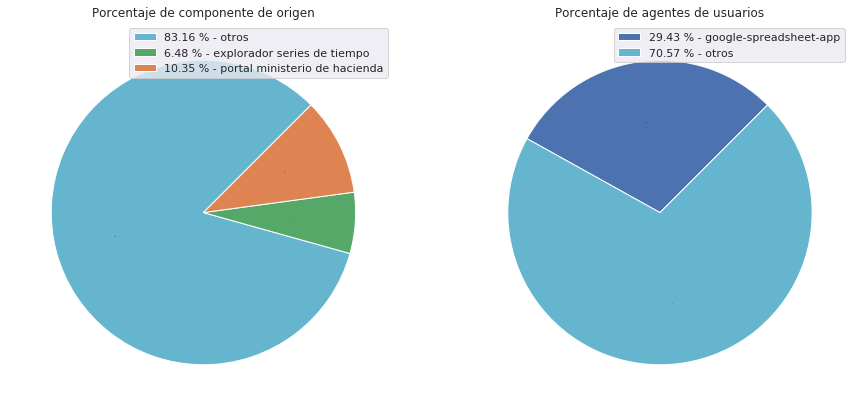

In [53]:
# fig, (ax1, ax2) = plt.subplots(1,2)
G = gridspec.GridSpec(1,2)

ax1 = subplot(G[0, 0])
pie_plot_w_legend(pd_df= x_source, title = 'Porcentaje de componente de origen', ax=ax1, colors_in_df=True)

ax2 = subplot(G[0, 1])
pie_plot_w_legend(pd_df= user_agent, title = 'Porcentaje de agentes de usuarios', ax=ax2, colors_in_df=True)

## Sobre las fuentes primarias

In [54]:
n_fuentes = df_serie_source.dataset_fuente.nunique()

mssg = """El catálogo de la SSPM incluye {} fuentes primarias. <br>
En un primer análisis destacan los siguientes puntos: <br><br>
1. el INDEC concentra el 75% de la actividad, y presenta más del 40% de las series del catálogo.<br>
2. el Ministerio de Hacienda, con más del 30% de las series del catálogo, apenas supera el 10% de usuarios del total.<br>
3. por el contrario, el BCRA con menos del 10% de las series, atrae a casi la totalidad de usuarios y ocupa un 15% de la actividad.<br><br>
En el anexo se presenta la tabla completa de fuentes primarias del catálogo. <br>
""".format(n_fuentes)

display_html(mssg)

In [55]:
# pd.set_option('display.float_format', lambda x: locale.format_string('%d', x, 1))
pd.set_option('display.float_format', lambda x: locale.format_string('%.2f', x, 1))

aux = df_fuentes_features.sort_values('usuarios', ascending=False)[['usuarios','consultas','series']]

aux['usuarios'] = aux['usuarios']/df_source_unfolded.ip_address.nunique()*100

for c in ['consultas','series']:
    aux[c] = aux[c]/aux[c].sum()*100
        
usr_floor = aux.usuarios > 10
calls_floor = aux.consultas > 14
series_floor = aux.series > 4

calls_pie = aux[calls_floor].consultas
calls_pie = calls_pie.append(pd.Series(100-aux[calls_floor].consultas.sum(), index=['Otros']))

series_pie = aux[series_floor].series
series_pie = series_pie.append(pd.Series(100-aux[series_floor].series.sum(), index=['Otros']))

usr_barh = aux[usr_floor].usuarios

# colores!
source_color = ['C{}'.format(i) for i in np.arange(len(usr_barh))]
source_color = pd.Series(source_color, index=usr_barh.index)
source_color = source_color.append(pd.Series('C9', index=['Otros']))

calls_pie = pd.concat([calls_pie, source_color], axis=1, join='inner')
series_pie = pd.concat([series_pie, source_color], axis=1, join='inner')
usr_barh = pd.concat([usr_barh, source_color], axis=1, join='inner')



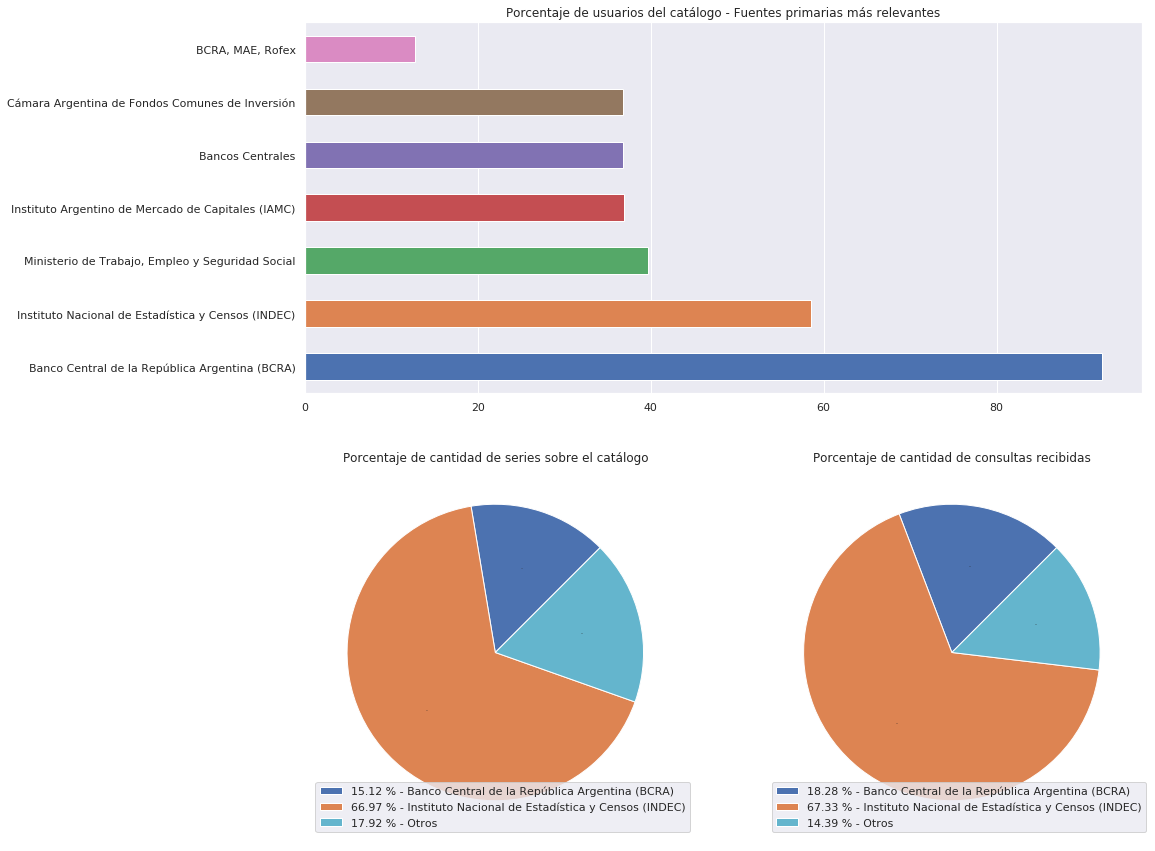

In [56]:
G = gridspec.GridSpec(2,2)
plt.figure(figsize=[15,30])

axes_1 = subplot(G[0, :])
usr_barh.usuarios.plot(kind='barh', title='Porcentaje de usuarios del catálogo - Fuentes primarias más relevantes', 
              figsize=[10,6], ax=axes_1, color=usr_barh.iloc[:,1]);
plt.grid(axis='y')

axes_2 = subplot(G[1, 0])
pie_plot_w_legend(pd_df= series_pie, title = 'Porcentaje de cantidad de series sobre el catálogo', ax=axes_2)

axes_3 = subplot(G[1, 1])
pie_plot_w_legend(pd_df = calls_pie, title = 'Porcentaje de cantidad de consultas recibidas', ax=axes_3)

## Estado de las series publicadas 

In [57]:
mssg = """Se definen para las series las siguientes características: <br><br>
- actualizada: serie que incluye datos de los últimos 14 días (únicamente series diarias) o últimos 2 períodos.<br>
- desactualizada: serie que incluye datos entre los últimos 15 y 90 días (únicamente series diarias), o entre los últimos 3 y 4 períodos.<br>
- discontinuada: serie que incluye datos con una antigüedad mayor a 90 días (únicamente series diarias), o 5 períodos.<br>"""

display_html(mssg)

In [58]:
# flow
# - calcular los días sin data.
# - hacer una fn para cada categoría (alcanza sólo con actualizada y desact.)
#     - quizás tenga que hacer un dict, con las frecuencias y los días de cada período. 
#     - y construir desp un dict con lo que aplica para cada categoría.
    
d_freq_days ={'R/P1D':1,
              'R/P1M':30,
              'R/P1Y':360,
              'R/P3M':90,
              'R/P6M':180}

MAX_DAYS_DAILY_SERIE_UPDATED = 14
MAX_PERIODS_SERIE_UPDATED = 2

MAX_DAYS_DAILY_SERIE_NOT_UPDATED = 90
MAX_PERIODS_SERIE_NOT_UPDATED = 4

def serie_is_actualizada(df):
#     print(df)
    if df.indice_tiempo_frecuencia == 'R/P1D':
        if df.serie_dias_sin_datos <= MAX_DAYS_DAILY_SERIE_UPDATED:
            df['serie_actualizada_usr'] = True
        else:
            df['serie_actualizada_usr'] = False
    else:
        if df.serie_dias_sin_datos / d_freq_days[df.indice_tiempo_frecuencia] <= MAX_PERIODS_SERIE_UPDATED:
            df['serie_actualizada_usr'] = True
        else:
            df['serie_actualizada_usr'] = False
    return df
            
def serie_is_desactualizada(df):
    if df.indice_tiempo_frecuencia == 'R/P1D':
        if (df.serie_dias_sin_datos > MAX_DAYS_DAILY_SERIE_UPDATED) and (df.serie_dias_sin_datos <= MAX_DAYS_DAILY_SERIE_NOT_UPDATED):
            df['serie_desactualizada_usr'] = True
        else:
            df['serie_desactualizada_usr'] = False
    else:
        dias_sin_datos = df.serie_dias_sin_datos / d_freq_days[df.indice_tiempo_frecuencia]
        if (dias_sin_datos > MAX_PERIODS_SERIE_UPDATED) and dias_sin_datos <= MAX_PERIODS_SERIE_NOT_UPDATED:
            df['serie_desactualizada_usr'] = True
        else:
            df['serie_desactualizada_usr'] = False
    return df

def serie_is_discontinuada(df):
    if df.indice_tiempo_frecuencia == 'R/P1D':
        if df.serie_dias_sin_datos > MAX_DAYS_DAILY_SERIE_NOT_UPDATED:
            df['serie_discontinuada_usr'] = True
        else:
            df['serie_discontinuada_usr'] = False
    else:
        dias_sin_datos = df.serie_dias_sin_datos / d_freq_days[df.indice_tiempo_frecuencia]
        if dias_sin_datos > MAX_PERIODS_SERIE_NOT_UPDATED:
            df['serie_discontinuada_usr'] = True
        else:
            df['serie_discontinuada_usr'] = False
    return df

In [59]:
lambda_days_wo_data = lambda x: (pd.Timestamp.today() - pd.Timestamp(x)).days
df_serie_source['serie_dias_sin_datos'] = df_serie_source.serie_indice_final.apply(lambda_days_wo_data)

In [60]:
df_serie_source = df_serie_source.apply(serie_is_actualizada, axis=1)
df_serie_source = df_serie_source.apply(serie_is_desactualizada, axis=1)
df_serie_source = df_serie_source.apply(serie_is_discontinuada, axis=1)

In [61]:
# actualizadas
series_actualizadas_per = df_serie_source.serie_actualizada.value_counts()/df_serie_source.serie_actualizada.count()*100

series_is_no_actualizada = df_serie_source.serie_actualizada == False
series_no_actualizadas = df_serie_source[series_is_no_actualizada].serie_id

# discontinuadas
DAYS_WO_DATA_MAX = 365*3
lambda_is_discontinued = lambda x: True if (pd.Timestamp.today() - pd.Timestamp(x)).days > DAYS_WO_DATA_MAX else False
lambda_days_wo_data = lambda x: (pd.Timestamp.today() - pd.Timestamp(x)).days

df_serie_source['serie_dias_sin_datos'] = df_serie_source.serie_indice_final.apply(lambda_days_wo_data)
df_serie_source['serie_discontinuada_adhoc'] = df_serie_source.serie_indice_final.apply(lambda_is_discontinued)

series_discontinuadas_bool = series_is_no_actualizada & df_serie_source.serie_discontinuada_adhoc

# series_discontinuadas_per = df_serie_source.serie_discontinuada_adhoc.value_counts()/df_serie_source.serie_discontinuada_adhoc.count()*100
series_discontinuadas_per = series_discontinuadas_bool.value_counts()/series_discontinuadas_bool.count()*100

series_is_no_discontinuada = df_serie_source.serie_discontinuada_adhoc == False

# desactualizadas
series_desactualizadas = df_serie_source[series_is_no_actualizada & series_is_no_discontinuada].serie_id
df_serie_source['serie_desactualizada'] = df_serie_source.serie_id.isin(series_desactualizadas)
series_desactualizadas_per = df_serie_source['serie_desactualizada'].value_counts()/df_serie_source.serie_id.count()*100

In [62]:
series_actualizadas_per = df_serie_source.serie_actualizada_usr.value_counts()/df_serie_source.serie_actualizada_usr.count()*100
series_desactualizadas_per = df_serie_source.serie_desactualizada_usr.value_counts()/df_serie_source.serie_desactualizada_usr.count()*100
series_discontinuadas_per = df_serie_source.serie_discontinuada_usr.value_counts()/df_serie_source.serie_discontinuada_usr.count()*100


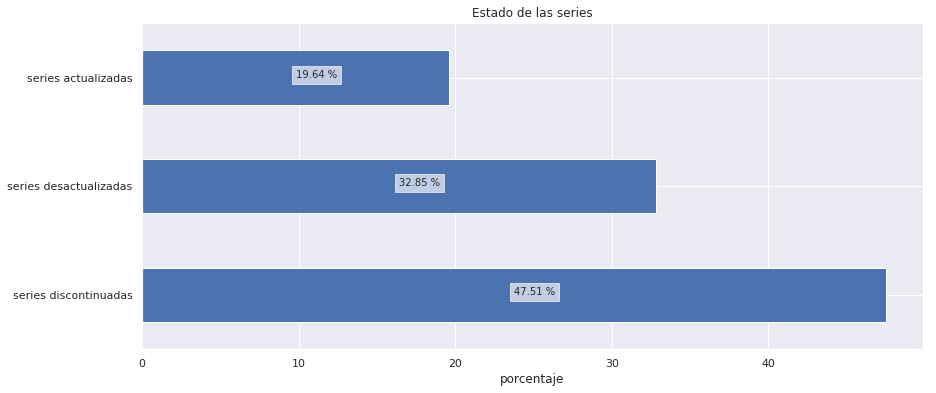

In [63]:
df_series_estado = pd.DataFrame([series_discontinuadas_per, 
                                 series_desactualizadas_per, 
                                 series_actualizadas_per], 
                                index=['series discontinuadas',
                                       'series desactualizadas',
                                       'series actualizadas'])

# df_series_estado.sort_values(False, ascending=False, inplace=True)
df_series_estado.plot(y=True, kind='barh',figsize=[14,6], title='Estado de las series', color='C0', legend=False)

t_y = [0, 1, 2]
t_x = [48, 35, 20]
l = ['1','2','3']
for i, record in enumerate(df_series_estado.iterrows()):
    ix, row = record
    plt.text(row[1]/2, i, '{:.2f} %'.format(row[1]),
            bbox=dict(facecolor='w', edgecolor='w', alpha=.65))
    
plt.xlabel('porcentaje');

### Histogramas de las series diaras actualizadas y desactualizadas

In [64]:
# para pasar a beni
# serie_es_diaria = df_serie_source.indice_tiempo_frecuencia == 'R/P1D'
# serie_esta_actualizada = df_serie_source.serie_actualizada == True

# df_serie_source[serie_es_diaria & serie_esta_actualizada][['serie_id','serie_descripcion','serie_indice_final','serie_dias_no_cubiertos']];

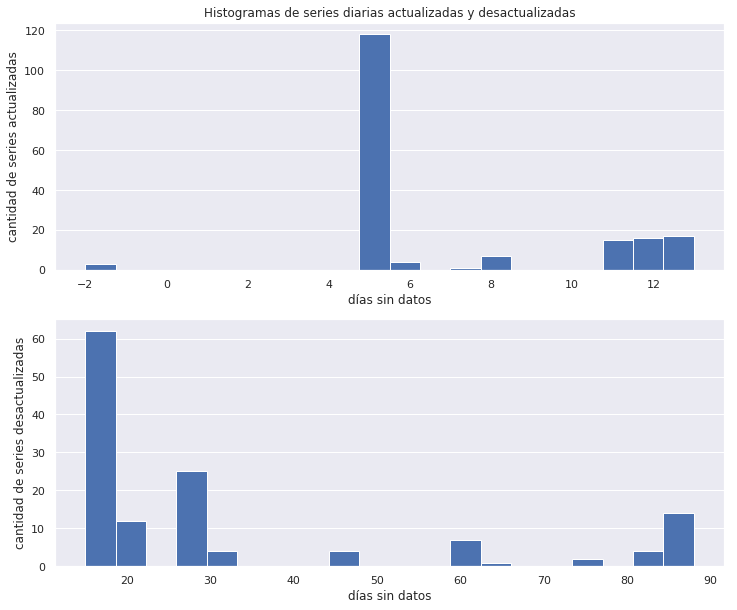

In [65]:
# serie_actualizada = df_serie_source.serie_actualizada == True
serie_actualizada = df_serie_source.serie_dias_sin_datos < 15
serie_actualizada = df_serie_source.serie_actualizada_usr

# serie_desactualizada = (df_serie_source.serie_actualizada == False) & (df_serie_source.serie_discontinuada_adhoc == False)
# serie_desactualizada = (~serie_actualizada) & (df_serie_source.serie_discontinuada_adhoc == False)
serie_desactualizada = df_serie_source.serie_desactualizada_usr


serie_es_diaria = df_serie_source.indice_tiempo_frecuencia == 'R/P1D'

# fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
fig, (ax1, ax2) = plt.subplots(2,1)
df_serie_source[serie_actualizada & serie_es_diaria].serie_dias_sin_datos.hist(bins=20, figsize=[12,10], ax=ax1);
ax1.set_title('Histogramas de series diarias actualizadas y desactualizadas');
ax1.set_xlabel('días sin datos')
ax1.set_ylabel('cantidad de series actualizadas');

df_serie_source[serie_desactualizada & serie_es_diaria].serie_dias_sin_datos.hist(bins=20, figsize=[12,10], ax=ax2);
# plt.title('Series diarias desactualizadas');
ax2.set_xlabel('días sin datos')
ax2.set_ylabel('cantidad de series desactualizadas');

ax1.grid(axis='x')
ax2.grid(axis='x')


## Llamadas mensuales - Período completo 

In [66]:
df_calls_full_date = df_calls_full.resample('D', on='date').sum().reset_index().copy()

filter_calls = df_calls_full_date.columns.str.contains('s_source') | df_calls_full_date.columns.str.contains('tota')
calls_columns = df_calls_full_date.columns[filter_calls]


# df_calls_full_date['consultas_source_inter'] = interpolate_by_days(df_calls_full_date, # df_calls_by_day_count
#                                             column= 'consultas_source', 
#                                             date_col='date',
#                                             days=42,
#                                             floor=750);
df_calls_full_date['consultas_source_inter'] = interpolate_by_days(df_calls_full_date, # df_calls_by_day_count
                                            column= 'serie_id_source', 
                                            date_col='date',
                                            days=42,
                                            floor=750);


# df_calls_full_date['consultas_total_inter'] = interpolate_by_days(df_calls_full_date,
#                                             column= 'serie_id_total', 
#                                             date_col='date',
#                                             days=42,
#                                             floor=8000);

# df_calls_full_date.loc[:,'propocion_inter'] = df_calls_full_date.consultas_source_inter.divide(df_calls_full_date.consultas_total_inter)*100

df_calls_full_month = df_calls_full_date.resample('M', on='date').agg({'consultas_source_inter': pd.Series.sum}).copy()
#                                                        'propocion_inter': pd.Series.mean}).copy()# sum()
df_calls_full_month.reset_index(inplace=True)

# # saco 2019
# df_calls_full_tx = df_calls_full_month.iloc[:-2,:].copy()
df_calls_full_tx = df_calls_full_month

# acorto date
df_calls_full_tx.loc[:,'date'] = df_calls_full_month.date.apply(pd.datetime.strftime,args=['%Y-%m'])
df_calls_full_tx.reset_index(inplace=True)

df_calls_full_tx = df_calls_full_tx.iloc[:-1,:]

# df_calls_full_tx['tendencia'] = add_linear_regression(df_calls_full_tx, 'consultas_source_inter')

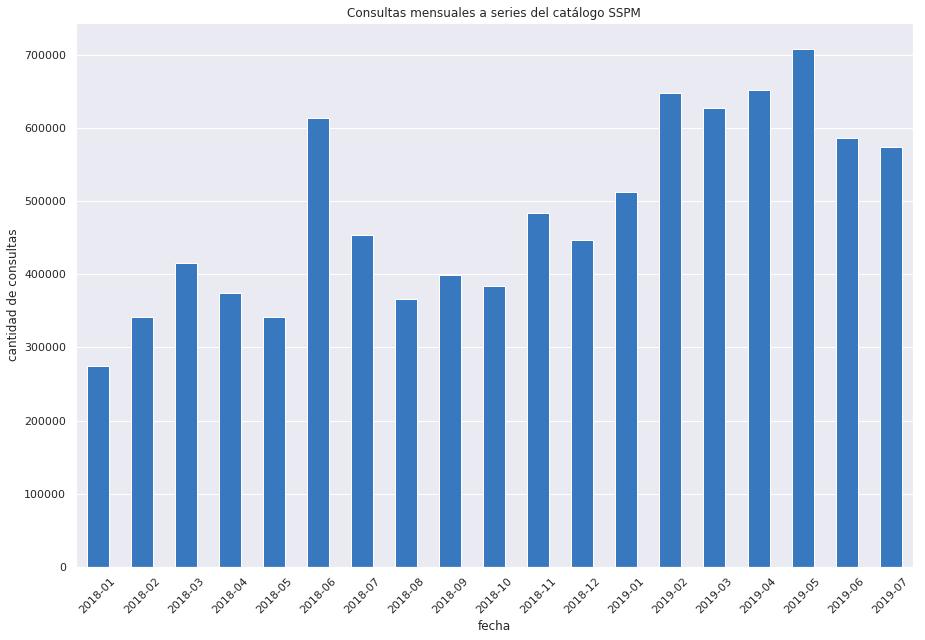

In [67]:
# n_row, n_col = df_calls_full_tx.shape
# scatter_color = np.array([sns.xkcd_rgb["windows blue"] for _ in range(n_row)])

fig, ax = plt.subplots(figsize=(15,10))

# df_calls_full_tx.plot.scatter(x='index', y='consultas_source_inter',ax=ax,legend=True, s=99, c=scatter_color);
df_calls_full_tx.plot.bar(x='date',
                          y='consultas_source_inter',
                          ax=ax,
                          legend=False, 
                          color=sns.xkcd_palette(["windows blue"]),
                          stacked=True);
# df_calls_full_tx.plot.line(y='tendencia',ax=ax,legend=True, lw=2, alpha=.4, style='--');

# ax.set_ylim(0,80000)
ax.set_ylabel('cantidad de consultas BCRA')
plt.grid(axis='x')

# ax2 = ax.twinx()
# df_calls_full_tx.plot.scatter(x='index', y='propocion_inter',ax=ax2,legend=True, s=99, c='green');
# df_calls_full_tx.plot.line(x='date',y='propocion_inter',ax=ax2,legend=True, lw=3, c='green');

# ax2.set_ylabel('cantidad de consultas totales')
# ax2.set_ylim(0,800000)

plt.xticks(df_calls_full_tx.index, df_calls_full_tx.date, rotation=45)
# plt.legend(fontsize=15)

plt.title('Consultas mensuales a series del catálogo SSPM')
plt.ylabel('cantidad de consultas')
plt.xlabel('fecha');

## Números generales

La mayor cantidad de series del catálogo SSPM en la API de Series de Tiempo son de frecuencia anual.

In [68]:
mssg = """Las series diarias son consultadas mucho más intensamemnte que las series de otras frecuencias.

En el período considerado ({}), las series diarias recibieron el {}% de las consultas a series del catálogo SSPM. Esto hace que en promedio, cada serie diaria haya sido consultada {} veces.""".format(str_periodo, str_perc_frec_diaria_source, str_calls_by_frec_diaria_source)

display_html(mssg)

En forma similar a como ocurre con la cantidad de llamadas a series de distintas frecuencias, vemos que las series diarias y mensuales tienen una base de usuarios mucho más amplia que las otras frecuencias:

In [69]:
df_series_by_freq.rename({'series_source':'series','proporcion_serie_source':'proporcion'}, axis=1, inplace=True)

df_hits_by_freq.rename({'consultas_source':'consultas','consultas_por_serie_source':'consultas_por_serie'},
                      axis=1, inplace=True)

df_ips_by_freq.columns = ['usuarios', 'other_sources_ip_cantidad']
df_ips_by_freq = add_totals(df_ips_by_freq)
df_ips_by_freq.loc['Total','usuarios'] = df_source_unfolded.ip_address.nunique()


df_1 = df_series_by_freq[['series','proporcion']]
df_2 = df_hits_by_freq[['consultas','consultas_por_serie']]
df_3 = df_ips_by_freq[['usuarios']]

df_series_by_frec_merge = pd.concat([df_1, df_2, df_3], axis=1, sort=True)

In [70]:
str_df_series_by_freq = put_df_on_report(df_series_by_frec_merge,title='Cantidad, consultas y usuarios de series disponibles en la API, por frecuencia')

display(HTML(str_df_series_by_freq))

,series,proporcion,consultas,consultas_por_serie,usuarios
R/P1D,"418,00","2,12 %","1.128.559,00","2.699,90","75.982,00"
R/P1M,"5.534,00","28,04 %","3.916.831,00","707,78","51.390,00"
R/P1Y,"7.888,00","39,97 %","229.700,00","29,12","4.384,00"
R/P3M,"5.506,00","27,90 %","526.667,00","95,65","39.516,00"
R/P6M,"389,00","1,97 %","8.136,00","20,92","139,00"
Total,"19.735,00","100,00 %","5.809.893,00","294,40","86.708,00"


### Sobre las consultas 

Las cinco series del catálogo SSPM más consultadas, reúnen el 25,37% de consultas totales realizadas: 

In [71]:
str_hits_top_5 = put_df_on_report(hits_top_5,title='Series más consultadas')

display(HTML(str_hits_top_5))

,serie_id,consultas,serie_descripcion,dataset_fuente,dataset_tema,frecuencia
0,103.1_I2N_2016_M_15,537539,IPC Núcleo. Base abr 2016. Mensual,Instituto Nacional de Estadística y Censos (INDEC),Precios,R/P1M
1,94.2_UVAD_D_0_0_10,486526,UVA diario,Banco Central de la República Argentina (BCRA),Dinero y Bancos,R/P1D
2,116.4_TCRZE_2015_D_36_4,212067,Índice de Tipo de Cambio Real Multilateral,Banco Central de la República Argentina (BCRA),Dinero y Bancos,R/P1D
3,168.1_T_CAMBIOR_D_0_0_26,137865,Tipo de Cambio BNA (Vendedor),"BCRA, MAE, Rofex",Mercados Financieros,R/P1D
4,143.3_ICE_SER_VM_2004_A_34,119824,EMAE desestacionalizado. Base 2004. Variación % mensual,Instituto Nacional de Estadística y Censos (INDEC),Actividad,R/P1M


### Sobre los usuarios

El 99,40% de los usuarios de la API Series de Tiempo consultan series del catálogo SSPM.<br>
En el período 2018-10-01 - 2019-08-07, la cantidad de usuarios fue de 83.107

Cuando vemos la popularidad de las series por cantidad de usuarios, en vez de por cantidad de llamadas, la lista de las series más populares cambia, mostrando que el grueso de los usuarios consulta la serie *Índice de Tipo de Cambio Real Multilateral*, seguidas de *Instrumentos del BCRA. Tasa de Política Monetaria.* y *Saldo comercial. En millones de dólares.*:

In [72]:
str_ips_top_5 = put_df_on_report(ips_top_5,title='Series con más usuarios')

display(HTML(str_ips_top_5))

,serie_id,usuarios,serie_descripcion,dataset_fuente,dataset_tema,frecuencia
0,116.4_TCRZE_2015_D_36_4,44718,Índice de Tipo de Cambio Real Multilateral,Banco Central de la República Argentina (BCRA),Dinero y Bancos,R/P1D
1,89.2_TS_INTE_PM_0_D_16,38228,Instrumentos del BCRA. Tasa de Política Monetaria.,Banco Central de la República Argentina (BCRA),Dinero y Bancos,R/P1D
2,74.3_ISC_0_M_19,37574,Saldo comercial. En millones de dólares.,Instituto Nacional de Estadística y Censos (INDEC),Sector Externo,R/P1M
3,145.3_INGNACUAL_DICI_M_38,35722,Tasa de variación mensual del Índice de Precios al Consumidor. Nivel General Nacional. Base diciembre 2016. Valores mensuales.,Instituto Nacional de Estadística y Censos (INDEC),Precios,R/P1M
4,45.2_ECTDT_0_T_33,31890,Tasa de desempleo total. En porcentaje.,Instituto Nacional de Estadística y Censos (INDEC),Empleo e Ingresos,R/P3M


In [73]:
# df_ips_by_freq.loc['Total',:] = [source_total_ips, other_sources_total_ips]

# df_ips_by_freq['source_ip_cantidad'] = df_ips_by_freq['source_ip_cantidad'].apply(lambda x: locale.format_string('%d', x, 1))

### Series populares 

El siguiente gráfico muestra la cantidad de usuarios por cantidad de llamadas, para cada serie del catálogo SSPM. <br>

Se trazan líneas auxiliares en la media de cada eje, y se sombrea el área que contiene a las series más consultadas y con mayor cantidad de usuarios.

In [74]:
df_hits_ips = df_source_hits[['serie_id','consultas']].merge(df_source_ips, how='inner' ,on='serie_id')
frec_series = pd.Series(df_hits_ips.frecuencia.unique())

df_hits_ips['frec_id'] = df_hits_ips[['serie_id','frecuencia']].groupby(['frecuencia']).ngroup()
df_hits_ips.rename({'ip_cantidad':'usuarios'}, axis=1,inplace=True)

# df_hits_ips['rank'] = df_hits_ips.consultas.apply(np.log10) * df_hits_ips.ip_cantidad.apply(np.log10)

for c in ['consultas', 'usuarios']:
    c_norm = c + '_norm'
    df_hits_ips[c_norm] = (df_hits_ips[c] - df_hits_ips[c].mean()) / (df_hits_ips[c].max() - df_hits_ips[c].min())

X = df_hits_ips.consultas.values.reshape(-1, 1)
Y = df_hits_ips.usuarios.values.reshape(-1, 1)

In [75]:
n_series = 20

# df_hits_ips['rank'] = df_hits_ips.consultas_norm + df_hits_ips.usuarios_norm

# top_usr_ix = df_hits_ips.nlargest(n_series, 'usuarios_norm').index.to_series()
# top_act_ix = df_hits_ips.nlargest(n_series, 'consultas_norm').index.to_series()

top_usr_ix = df_hits_ips['usuarios'] > 900
top_act_ix = df_hits_ips['consultas'] > 30000

# top_ix = top_act_ix[top_act_ix.isin(top_usr_ix)]
top_ix = top_act_ix & top_usr_ix

In [76]:
# df_hits_ips.loc[:,'rank'] = df_hits_ips.index.to_series().isin(top_ix)
df_hits_ips.loc[:,'rank'] = top_ix


# df_hits_ips.loc[:,'rank'] = True if (df_hits_ips.index.to_series() in top_usr_ix) and (df_hits_ips.index.to_series() in top_act_ix) else False

top_rank = df_hits_ips[df_hits_ips['rank']==True].sort_values('usuarios',ascending=False) #.head(n_series)
# top_rank = df_hits_ips.nlargest(n_series, 'rank', keep='all')
# top_rank = df_hits_ips.nsmallest(n_series, 'rank', keep='all')
top_rank_short = top_rank.iloc[:,[0,3,5,4,1,2]].reset_index(drop=True)

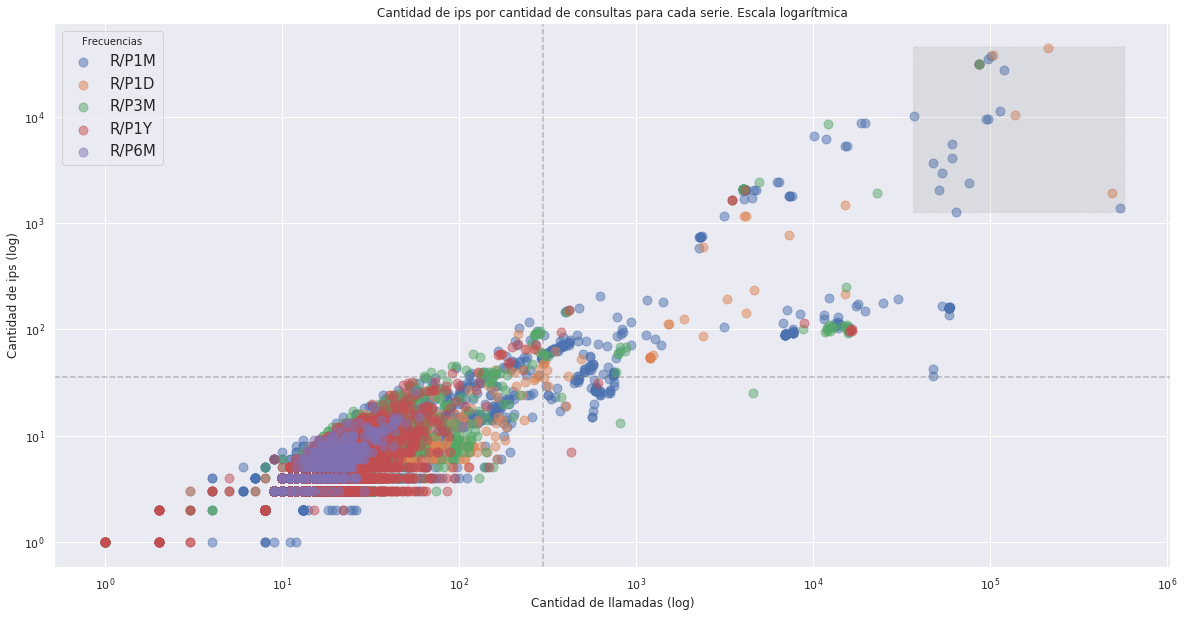

In [77]:
fourth_quad = (X >= log_midpoint(X)) & (Y <= log_midpoint(Y))
fourth_quad = fourth_quad.squeeze()

second_subquad = (X >= midpoint(X)) & (Y <= midpoint(Y)) & (Y >= log_midpoint(Y))
second_subquad = second_subquad.squeeze()

forth_subquad = (X <= midpoint(X)) & (Y >= midpoint(Y)) & (X >= log_midpoint(X))
forth_subquad = forth_subquad.squeeze()

fig, ax = plt.subplots(figsize=(20,10))


for frec in df_hits_ips.frecuencia.unique():
    is_frec = df_hits_ips.frecuencia.str.contains(frec)
    if is_frec.sum() > 0:
        X_frec = df_hits_ips[is_frec].consultas
        y_frec = df_hits_ips[is_frec].usuarios

        plt.scatter(X_frec, y_frec, s=80,  label=frec, alpha=.5);

out_X = X[second_subquad | forth_subquad].squeeze()
out_y = Y[second_subquad | forth_subquad].squeeze()

out_toggler = np.array([np.where(out_X==n)[0][0]%2 for n in out_X])
out_toggler[np.where(out_toggler==0)[0]] = -1
out_toggler = -1*out_toggler

plt.legend(fontsize=15, title='Frecuencias')

labels = df_hits_ips[second_subquad | forth_subquad].serie_descripcion.values

plt.axvline(x=np.mean(X),ymin=0, ymax=1, linestyle='--', color='grey', alpha=0.5)
plt.axhline(y=np.mean(Y),xmin=0, xmax=1, linestyle='--', color='grey', alpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.title('Cantidad de ips por cantidad de consultas para cada serie. Escala logarítmica')
plt.xlabel('Cantidad de llamadas (log)')
plt.ylabel('Cantidad de ips (log)');

rect = patches.FancyBboxPatch((top_rank.consultas.min(),top_rank.usuarios.min()), width=top_rank.consultas.max(), height=top_rank.usuarios.max()
                         , color='grey', linestyle='--', alpha=0.15)

ax.add_patch(rect);



In [78]:
str_top_rank = put_df_on_report(top_rank_short.sort_values('usuarios', ascending=False), 'Las series más populares')

display(HTML(str_top_rank))

,serie_id,serie_descripcion,dataset_tema,dataset_fuente,consultas,usuarios
0,116.4_TCRZE_2015_D_36_4,Índice de Tipo de Cambio Real Multilateral,Dinero y Bancos,Banco Central de la República Argentina (BCRA),212067,44718
1,89.2_TS_INTE_PM_0_D_16,Instrumentos del BCRA. Tasa de Política Monetaria.,Dinero y Bancos,Banco Central de la República Argentina (BCRA),104129,38228
2,74.3_ISC_0_M_19,Saldo comercial. En millones de dólares.,Sector Externo,Instituto Nacional de Estadística y Censos (INDEC),100903,37574
3,145.3_INGNACUAL_DICI_M_38,Tasa de variación mensual del Índice de Precios al Consumidor. Nivel General Nacional. Base diciembre 2016. Valores mensuales.,Precios,Instituto Nacional de Estadística y Censos (INDEC),97236,35722
4,45.2_ECTDT_0_T_33,Tasa de desempleo total. En porcentaje.,Empleo e Ingresos,Instituto Nacional de Estadística y Censos (INDEC),86273,31890
5,131.1_FET_0_0_12,FF (Federal Funds) - EE.UU - Tasa,Economía Internacional,Bancos Centrales,85902,31880
6,169.1_MALVAL_0_0_6,Índice Merval del IAMC,Mercados Financieros,Instituto Argentino de Mercado de Capitales (IAMC),86423,31877
7,38.3_CEM_1994_M_7,Ventas al mercado interno de Producción Nacional de cemento en miles de toneladas,Actividad,Instituto Nacional de Estadística y Censos (INDEC),85820,31856
8,154.2_COBAOBA_S_0_0_7,Asalariados registrados del sector privado según provincia cordoba,Empleo e Ingresos,"Ministerio de Trabajo, Empleo y Seguridad Social",85866,31847
9,172.3_TL_RECA_IA_M_0_0_24,Total recaudación. Variación interanual,Finanzas Públicas,Cámara Argentina de Fondos Comunes de Inversión,85818,31833


# Cantidad de llamadas 

## Perfil de las series

Promedio por día y por semana de las consultas a las series del catálogo SSPM:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>promedio</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>por día</th>
      <td>18.449,90</td>
    </tr>
    <tr>
      <th>por semana</th>
      <td>127.099,33</td>
    </tr>
  </tbody>
</table>
</div>


In [79]:
days_name = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']

source_calls_by_day_count = df_source_unfolded[['serie_id','date']].groupby(['date']).count()
source_calls_by_weekday = source_calls_by_day_count.groupby(pd.DatetimeIndex(source_calls_by_day_count.index).weekday)

source_calls_by_weekday_avg = source_calls_by_weekday.mean().reset_index()
source_calls_by_weekday_avg = source_calls_by_weekday_avg.rename(index=str, columns={"serie_id":"source_calls"})

other_sources_calls_by_day_count = df_other_sources_unfolded[['serie_id','date']].groupby(['date']).count()
other_sources_calls_by_weekday = other_sources_calls_by_day_count.groupby(pd.DatetimeIndex(other_sources_calls_by_day_count.index).weekday)

other_sources_calls_by_weekday_avg = other_sources_calls_by_weekday.mean().reset_index()
other_sources_calls_by_weekday_avg = other_sources_calls_by_weekday_avg.rename(index=str, columns={"serie_id":"other_sources_calls"})

calls_by_weekday_avg = source_calls_by_weekday_avg.merge(other_sources_calls_by_weekday_avg,on='date')


calls_by_weekday_avg['day'] = days_name
calls_by_weekday_avg.set_index('day',inplace=True)

c_max = calls_by_weekday_avg['source_calls'].max()
c_min = calls_by_weekday_avg['source_calls'].mean()

c_delta = (c_max - c_min)/c_max*100
str_c_delta = f_ar(c_delta)

### Perfil de series diarias

A continuación se presenta el promedio de llamadas por hora y por día de la semana para las series diarias.

Se observa que los valores son mayores para las horas de oficina, por lo que se entiende que detrás del consumo de las series hay un factor de trabajo humano ascociado.

In [80]:
source_calls_date_hr_count = df_source_unfolded[['serie_id','date', 'hour']].groupby(['date','hour']).count().reset_index()
source_calls_day_hour_mean = source_calls_date_hr_count.groupby([pd.DatetimeIndex(source_calls_date_hr_count.date).weekday,'hour']).mean()
source_calls_day_hour_mean = source_calls_day_hour_mean.unstack(level=-2)
source_calls_day_hour_mean.sort_index(ascending=False, inplace=True)

source_calls_day_hour_mean = source_calls_day_hour_mean.loc[21:7,:]

# source_calls_day_hour_mean.rename({0:''}, axis=1, inplace=True)


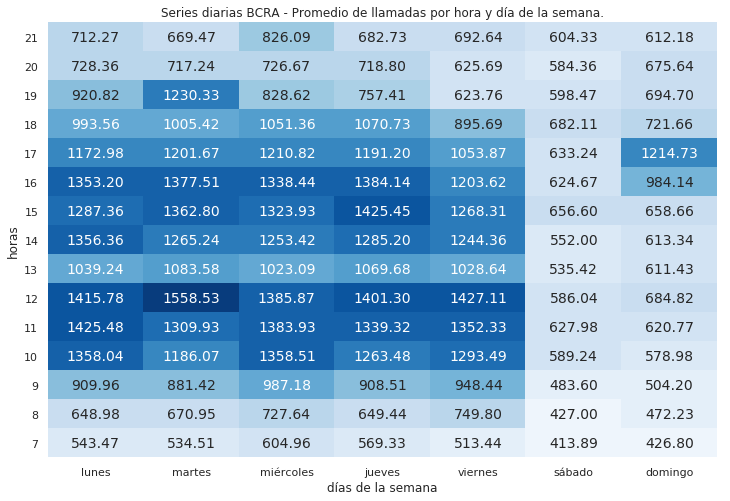

In [81]:
plt.figure(figsize=[12,8])

sns.heatmap(source_calls_day_hour_mean, cmap=sns.color_palette("Blues", 20), annot=True, fmt='.2f', annot_kws={'size': 14}, cbar=False);

plt.xticks(ticks=source_calls_day_hour_mean.columns.levels[1]+.5 ,labels=days_name)
plt.yticks(rotation='horizontal')
plt.ylabel('horas')
plt.xlabel('días de la semana')
plt.title('Series diarias BCRA - Promedio de llamadas por hora y día de la semana.');

# Cantidad de usuarios 

En esta sección se describe el comportamiento de los usuarios que consumen series del catálogo SSPM en la API Series de Tiempo.

## Comportamiento de usuarios segmentados por tipo de consumo 

Para entender el comportamiento de los usuarios, se consideran las siguientes variables:
   - _persistencia_: proporción de semanas en las que el usuario utilizó el servicio en el período considerado, y
   - _actividad_: promedio diario de consultas realizadas en el período considerado.

### Descripción de la variables

In [82]:
pd.set_option('display.float_format', lambda x: locale.format_string('%.2f', x, 1))

In [83]:
df_features = get_ip_features(df_source_unfolded, frequencies={'persistencia':'W','actividad':'D'}, scales={'persistencia':'linear','actividad':'linear'})
features_described = df_features.describe().loc[['mean','std','min','max'],:]

In [84]:
str_features_described = put_df_on_report(features_described,'Medidias de las variables')

display(HTML(str_features_described))

,actividad,persistencia
mean,"9,20","3,57"
std,"34,35","4,68"
min,"1,00","2,17"
max,"3.048,57","100,00"


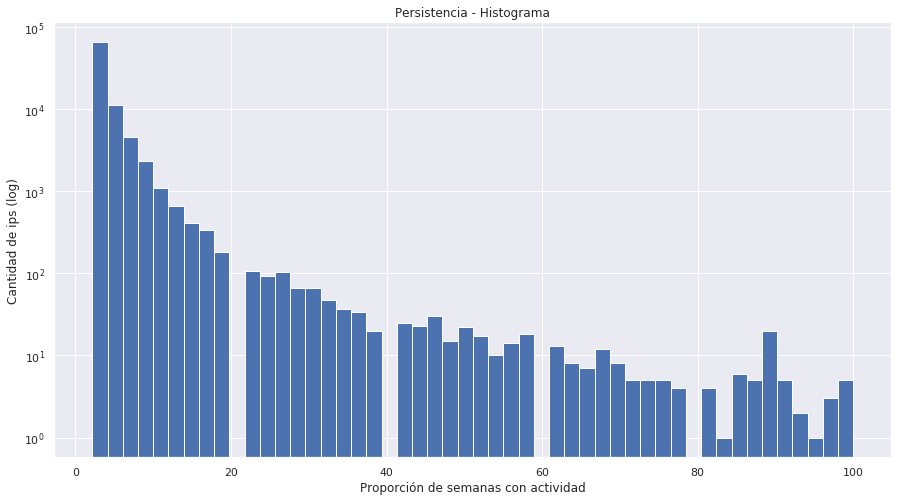

In [85]:
# get_ips_persistency(df_source_unfolded).hist(bins=50, figsize=[15,8])
df_features[['persistencia']].hist(bins=50, figsize=[15,8])
plt.yscale('log')
plt.title('Persistencia - Histograma')
plt.ylabel('Cantidad de ips (log)')
plt.xlabel('Proporción de semanas con actividad');

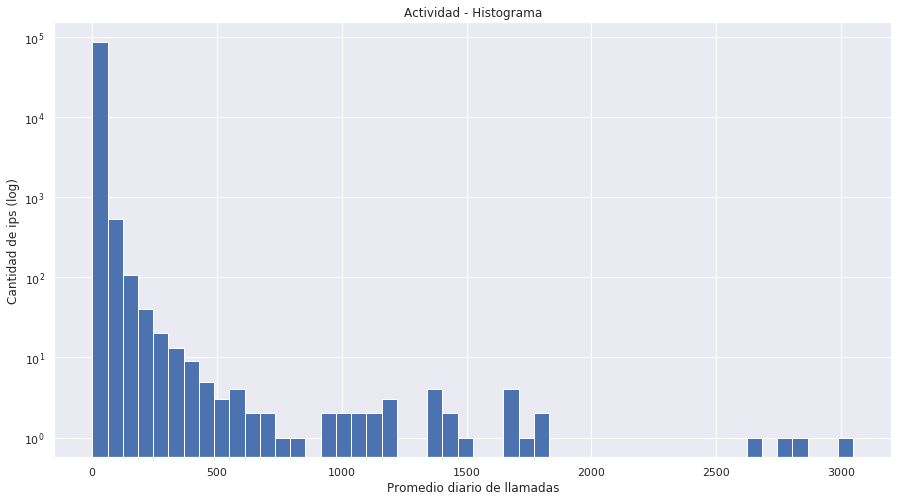

In [86]:
df_features[['actividad']].hist(bins=50, figsize=[15,8])
plt.yscale('log')
plt.title('Actividad - Histograma')
plt.ylabel('Cantidad de ips (log)')
plt.xlabel('Promedio diario de llamadas');

In [87]:
del df_features
del df_analytics
del df_unfolded
gc.collect()

42546

### Segmentación para el período completo

Se identifican seis grupos de usuarios:
1. Ocasionales: Presenta niveles muy bajos de actividad y persistencia. Es el grupo de usuarios más extenso.
1. Exploratorios 1: Tiene niveles bajos de actividad y persistencia.
1. Exploratorios 2: Aún con actividad baja, es significativamente más persistentes que Exploratorios 1.
1. Regulares: Alcanza niveles medios de actividad y persistencia.
1. Persistentes: Tiene nivel medio de actividad y nivel alto persistencia.
1. Intensivos: Presenta alto nivel de actividad. Es el grupo con mayor dispersión.


En los siguientes gráficos se muestran:
- Para cada usuario, la relación entre su _persistencia_ y su _actividad_, distinguiendo cuatro grupos según esas variables.
- La media de los cuatro grupos con las variables normalizadas en los ejes. El tamaño del grupo en el gráfico, refiere a la cantidad de usuarios de cada uno. Por cuestiones gráficas, se excluye el grupo *intensivo*.
- Las proporciones de usuarios y llamadas que toma cada grupo.

In [88]:
group_qty = 6

group_names = ['ocasionales', 'persistentes', 'exploratorios 2', 'regulares', 'exploratorios 1', 'intensivos']
group_colors = ['C{}'.format(i%10) for i in np.arange(len(group_names))]

df_cluster = cluster_ips(df_source_unfolded, n_kmeans=group_qty,
                         frequencies={'persistencia':'W','actividad':'D'},
                         scales={'persistencia':'linear','actividad':'linear'},
                         labels= group_names);

df_group_colors = pd.DataFrame(group_colors, index=group_names, columns=['color'])

df_cluster = df_cluster.merge(df_group_colors, left_on='cluster_name', right_index=True)

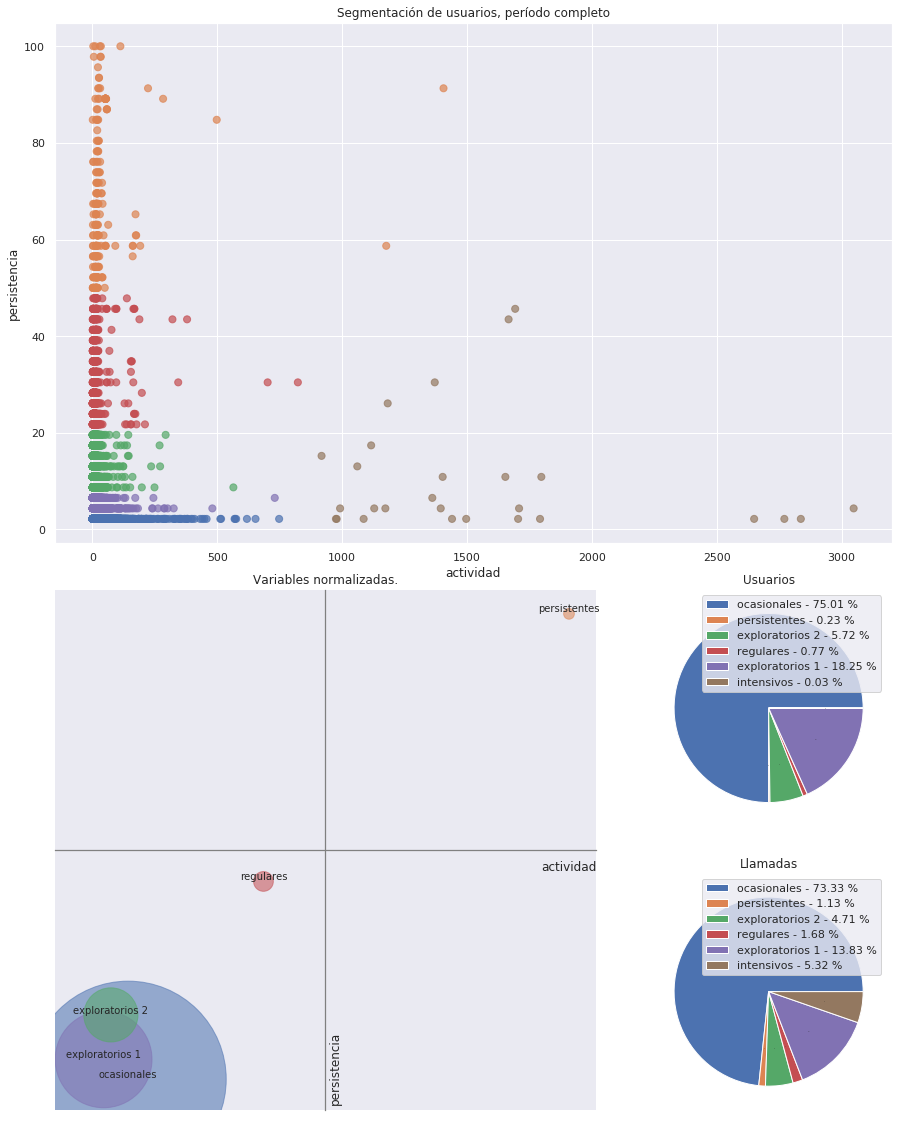

In [89]:
make_cluster_plots(df_cluster, clusters=group_qty, exclude_clusters_id=[group_qty-1])

In [90]:
df_unfolded_clusters = df_source_unfolded[['ip_address','serie_id','indice_tiempo_frecuencia']].merge(df_cluster, on='ip_address')

serie_diaria = df_unfolded_clusters.indice_tiempo_frecuencia.str.contains('R/P1D')

# df_id_unicas_por_cluster = df_unfolded_clusters.groupby('cluster_id').nunique()['serie_id'].reset_index()
# df_id_diarias_unicas_por_cluster = df_unfolded_clusters[serie_diaria].groupby('cluster_id').nunique()['serie_id'].reset_index()

df_id_unicas_por_cluster = df_unfolded_clusters.groupby('cluster_id').nunique()['serie_id'].reset_index()
# df_id_unicas_por_cluster = df_id_unicas_por_cluster.groupby

df_id_diarias_unicas_por_cluster = df_unfolded_clusters[serie_diaria].groupby('cluster_id').nunique()['serie_id'].reset_index()

addd = df_id_unicas_por_cluster.merge(df_id_diarias_unicas_por_cluster, on='cluster_id')
addd['proporcion_series_diarias'] = addd.serie_id_y / addd.serie_id_x * 100


In [91]:
df_series_avg = get_nunique_series_avg(df_source_unfolded, frequency='D')
df_cluster = df_cluster.merge(df_series_avg, how='inner', on='ip_address')

df_cluster_profile = df_cluster.groupby(['cluster_id','cluster_name']).agg({'ip_address': pd.Series.nunique,
                                        'actividad': pd.Series.mean,
                                        'persistencia': pd.Series.mean,
#                                         'series_unicas_diarias': pd.Series.mean,
#                                         'series_unicas_semanales': pd.Series.mean,
                                        'series_unicas_mensuales': pd.Series.mean,
#                                         'series_unicas': pd.Series.sum,
#                                         'series_diarias_unicas': pd.Series.sum
                                                                           }).reset_index()

# df_cluster_profile['proporcion_series_diarias'] = df_cluster_profile.series_diarias_unicas / df_cluster_profile.series_unicas * 100
# df_cluster_profile.drop(columns=['series_unicas','series_diarias_unicas'], inplace=True)

df_cluster_profile = df_cluster_profile.sort_values('actividad',ascending=False).reset_index(drop=True)
df_cluster_profile.rename({'ip_address':'usuarios', 'cluster_name':'grupo'}, axis=1, inplace=True)

for c in df_cluster_profile.columns[2:].values:
    df_cluster_profile[c] = df_cluster_profile[c].apply(lambda x: locale.format_string('%.2f', x, 1))

df_cluster_profile = df_cluster_profile.merge(addd[['cluster_id','proporcion_series_diarias']], on='cluster_id')
# df_cluster_profile = df_cluster_profile.merge(addd, on='cluster_id')

En el perfil de los grupos se incluye el promedio mensual de la cantidad de series distintas que consultan (*series_unicas_mensuales*) y la proporción de series diarias en el total de series únicas consultadas (*proporcion_series_diaras*).

In [92]:
str_df_cluster_profile = put_df_on_report(df_cluster_profile.iloc[:,1:], 'Perfil de los grupos')

display(HTML(str_df_cluster_profile))

,grupo,usuarios,actividad,persistencia,series_unicas_mensuales,proporcion_series_diarias
0,intensivos,"27,00","1.570,26","10,31","1.569,65","2,09"
1,persistentes,"200,00","45,22","67,90","63,37","2,10"
2,regulares,"665,00","20,11","30,10","13,08","3,16"
3,ocasionales,"65.038,00","8,99","2,17","6,69","3,36"
4,exploratorios 2,"4.958,00","7,57","11,25","5,72","4,14"
5,exploratorios 1,"15.820,00","6,97","4,98","5,22","5,48"


### Series más consultadas por grupo

In [93]:
df_cluster_unfolded = df_source_unfolded.merge(df_cluster[['ip_address','cluster_name']], on='ip_address', how='inner')

In [94]:
grouper = df_cluster_unfolded.groupby('cluster_name')
counter = grouper.nunique()[['ip_address']].reset_index()
clister_ips = counter.sort_values('ip_address')

names_sorted = clister_ips.cluster_name

In [95]:
grouper = df_cluster_unfolded.groupby(['cluster_name','serie_id'] )
counter = grouper.count()[['ids']].reset_index()
sorter = counter.sort_values(['cluster_name','ids'], ascending=False)

head_five = sorter.groupby('cluster_name').head(5)
head_five = head_five.merge(df_serie_short, on='serie_id').rename({'serie_id':None}, axis=1)
head_five = head_five.set_index(None)

head_five.columns = ['cluster_name', 'consultas', 'descripcion', 'fuente_primaria', 'tema', 'frecuencia']

str_dfs = ''
for n in names_sorted:
    filter_n = head_five.cluster_name == n
    df = head_five[filter_n].iloc[:,[2,3,4,5,1]].sort_values('consultas',ascending=False)
    str_dfs += put_df_on_report(df,title='Grupo {}'.format(n))
    str_dfs += '<br><br>'
#     display(head_five[filter_n])

In [96]:
display(HTML(str_dfs))

,descripcion,fuente_primaria,tema,frecuencia,consultas
103.1_I2N_2016_M_15,IPC Núcleo. Base abr 2016. Mensual,Instituto Nacional de Estadística y Censos (INDEC),Precios,R/P1M,61056
168.1_T_CAMBIOR_D_0_0_26,Tipo de Cambio BNA (Vendedor),"BCRA, MAE, Rofex",Mercados Financieros,R/P1D,35496
101.1_I2NG_2016_M_22,IPC Nivel General. Base abr 2016. Mensual,Instituto Nacional de Estadística y Censos (INDEC),Precios,R/P1M,34176
102.1_I2NG_ABRI_M_22,IPC Nivel General. Base abr 2016. Mensual,Instituto Nacional de Estadística y Censos (INDEC),Precios,R/P1M,32361
116.3_TCRMA_0_M_36,Índice de Tipo de Cambio Real Multilateral,Banco Central de la República Argentina (BCRA),Dinero y Bancos,R/P1M,24636
,descripcion,fuente_primaria,tema,frecuencia,consultas
103.1_I2N_2016_M_15,IPC Núcleo. Base abr 2016. Mensual,Instituto Nacional de Estadística y Censos (INDEC),Precios,R/P1M,458713
94.2_UVAD_D_0_0_10,UVA diario,Banco Central de la República Argentina (BCRA),Dinero y Bancos,R/P1D,235559
143.3_NO_PR_2004_A_21,EMAE. Base 2004,Instituto Nacional de Estadística y Censos (INDEC),Actividad,R/P1M,59656
143.3_ICE_SER_VM_2004_A_34,EMAE desestacionalizado. Base 2004. Variación % mensual,Instituto Nacional de Estadística y Censos (INDEC),Actividad,R/P1M,58889


# Anexo

## Fuentes primarias

In [97]:
for c in ['series','consultas']:
    new_c = '{}_porcentaje'.format(c)
    df_fuentes_features[new_c] = df_fuentes_features[c]/df_fuentes_features[c].sum()*100
    
nunique_ips = df_source_unfolded.ip_address.nunique()
df_fuentes_features['usuarios_porcentaje'] = df_fuentes_features['usuarios'].divide(nunique_ips)*100        

aux = add_totals(df_fuentes_features.iloc[:,[0,2,1,5,6,7]].sort_values('consultas', ascending=False))

for c in aux.columns[-3:]:
        aux[c] = aux[c].apply(lambda x: locale.format_string('%.2f %%', x, 1))

aux.iloc[-1,2] = nunique_ips
aux.iloc[-1,-1] ='100,00 %'

In [98]:
str_fuentes = put_df_on_report(aux, 'Fuentes primarias del catálogo SSPM')

display(HTML(str_fuentes))

,series,consultas,usuarios,series_porcentaje,consultas_porcentaje,usuarios_porcentaje
Instituto Nacional de Estadística y Censos (INDEC),"8.626,00","3.911.737,00","50.711,00","43,71 %","67,33 %","58,48 %"
Banco Central de la República Argentina (BCRA),"1.947,00","1.062.320,00","79.967,00","9,87 %","18,28 %","92,23 %"
Ministerio de Hacienda,"6.854,00","203.202,00","6.228,00","34,73 %","3,50 %","7,18 %"
"BCRA, MAE, Rofex","19,00","156.789,00","11.024,00","0,10 %","2,70 %","12,71 %"
"Ministerio de Trabajo, Empleo y Seguridad Social","129,00","129.643,00","34.426,00","0,65 %","2,23 %","39,70 %"
Cámara Argentina de Fondos Comunes de Inversión,"40,00","103.356,00","31.874,00","0,20 %","1,78 %","36,76 %"
Instituto Argentino de Mercado de Capitales (IAMC),"272,00","103.086,00","31.948,00","1,38 %","1,77 %","36,85 %"
Bancos Centrales,"19,00","91.662,00","31.922,00","0,10 %","1,58 %","36,82 %"
UNCTAD,"729,00","10.278,00","54,00","3,69 %","0,18 %","0,06 %"
Fondo Monetario Internacional (FMI),"192,00","6.163,00","779,00","0,97 %","0,11 %","0,90 %"
